In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import umap
import umap.plot
from sklearn.preprocessing import StandardScaler

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/UMAP'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

48

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01


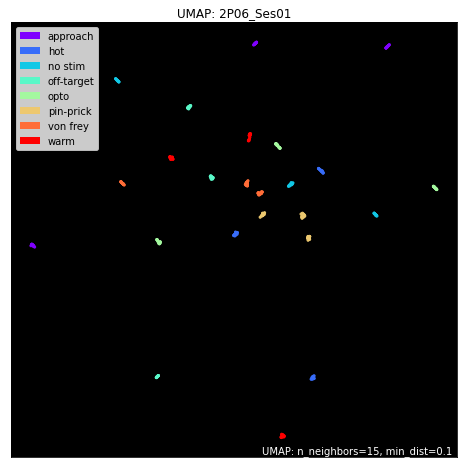

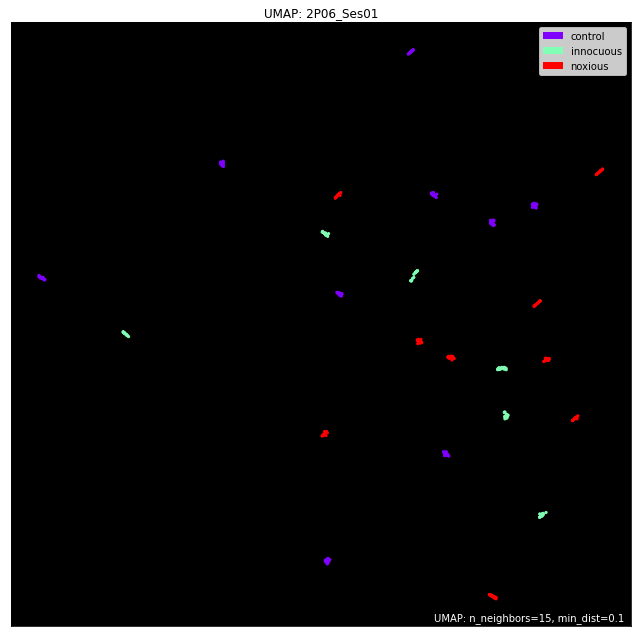

processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02


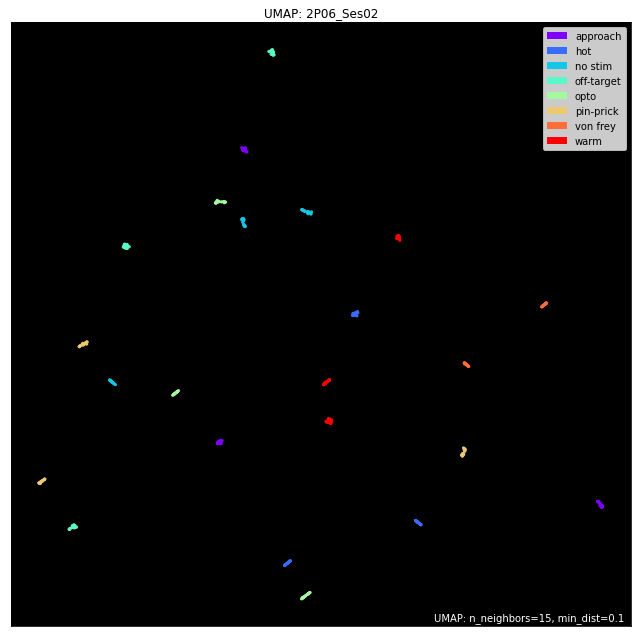

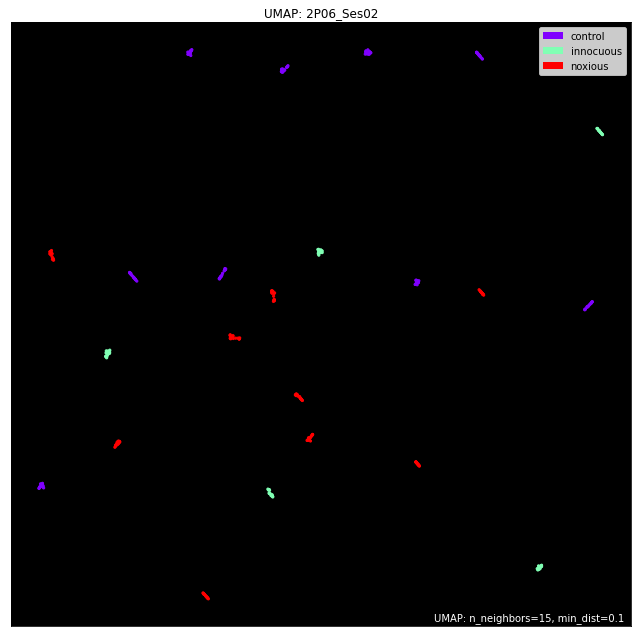

processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03


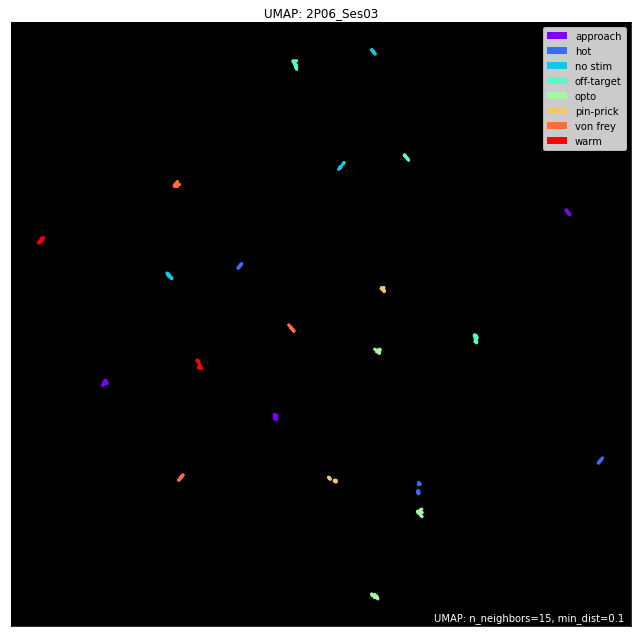

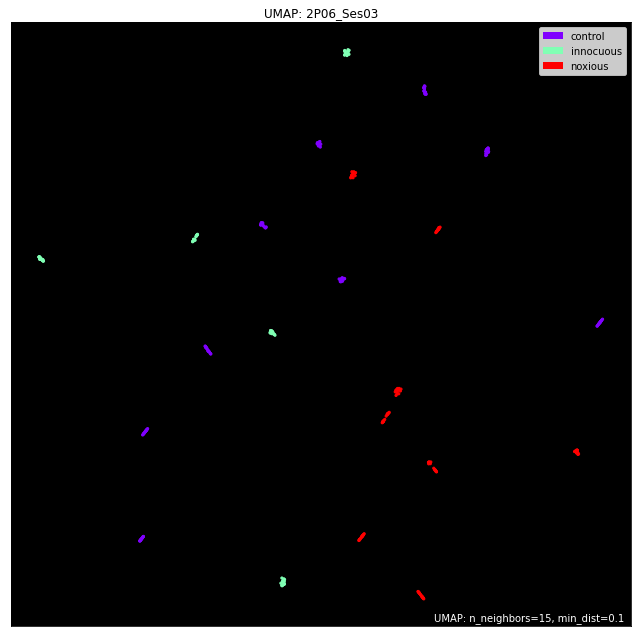

processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04


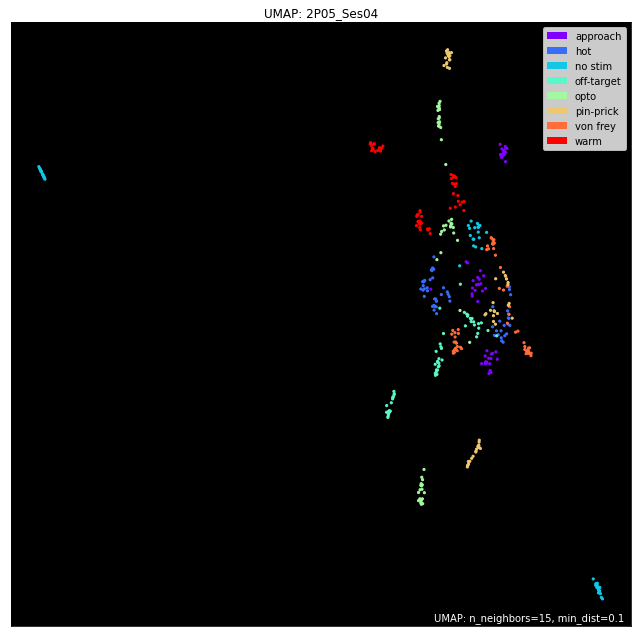

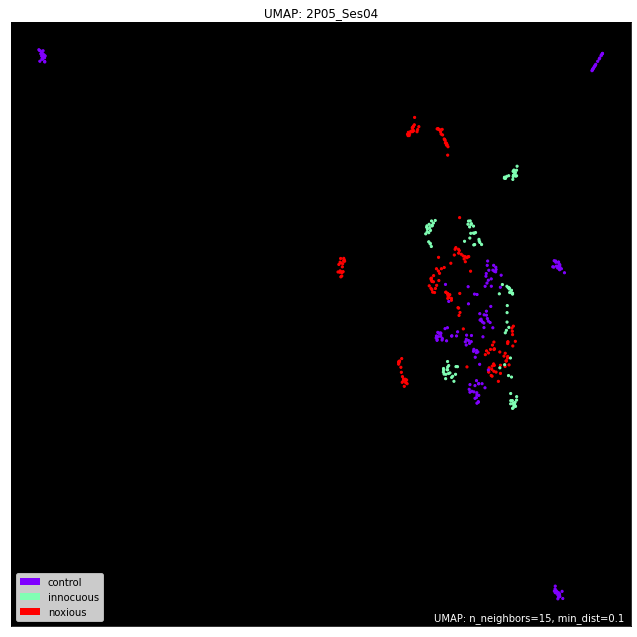

processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04


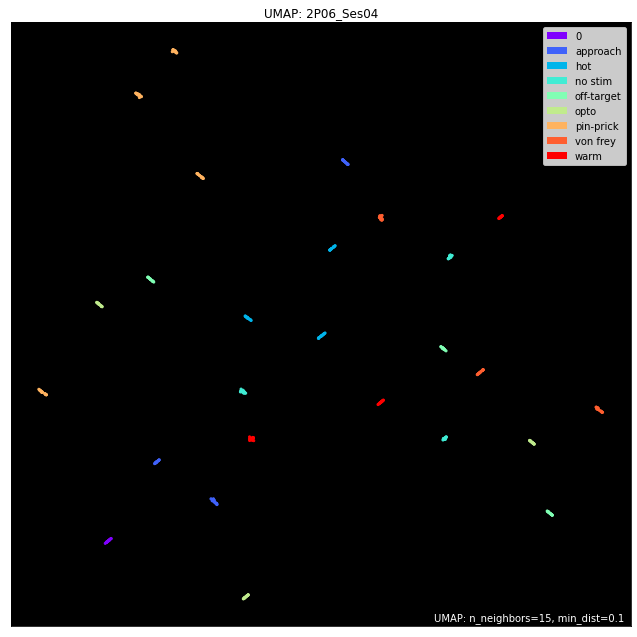

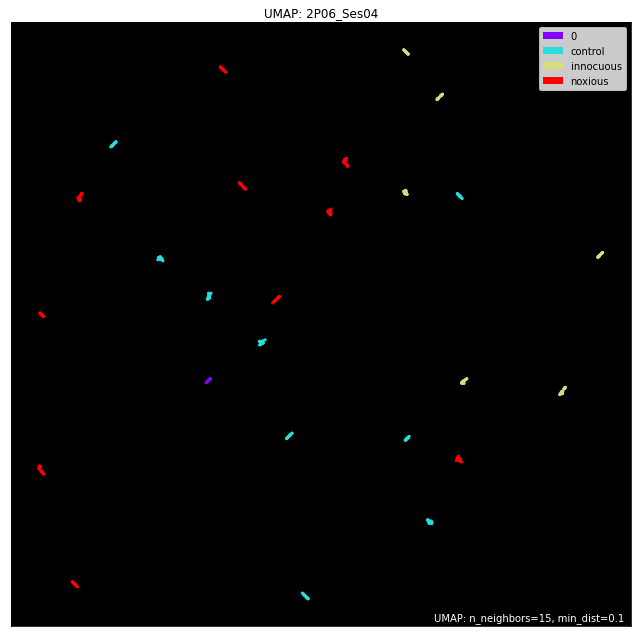

processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05


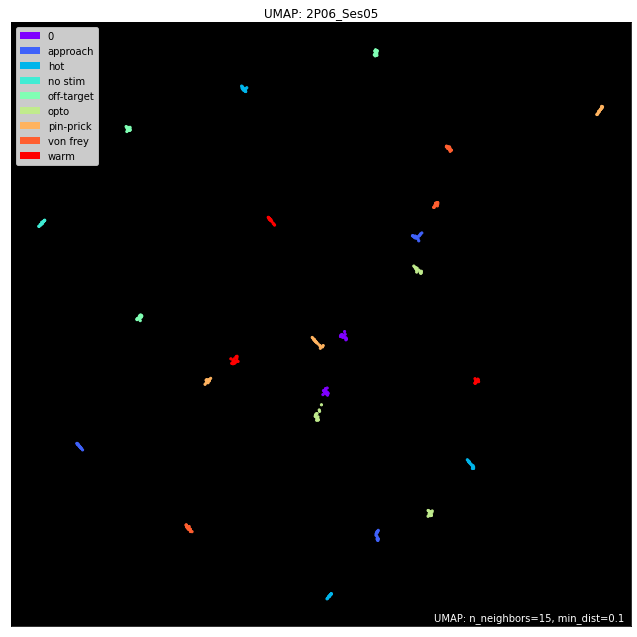

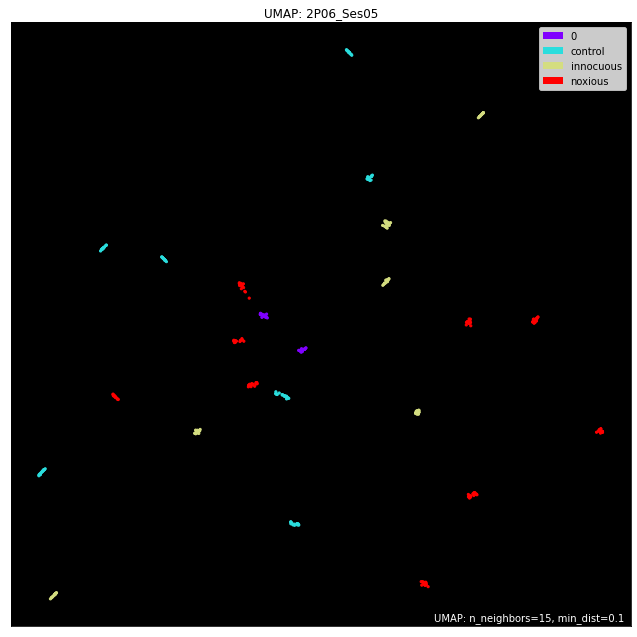

processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06


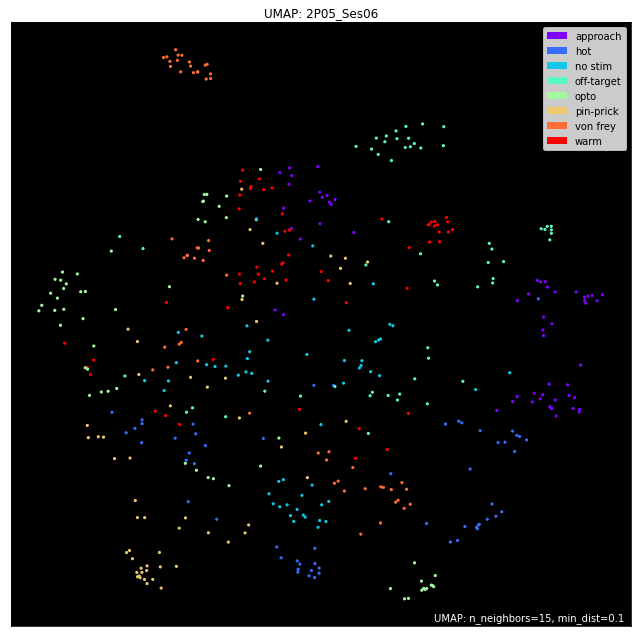

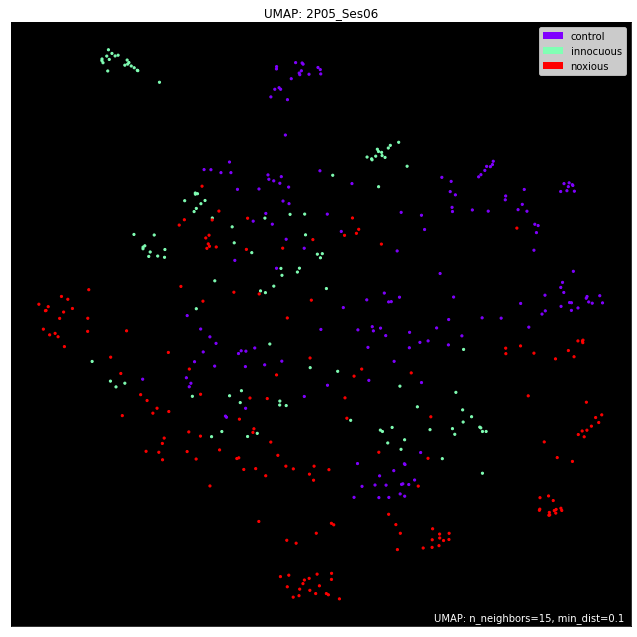

processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06


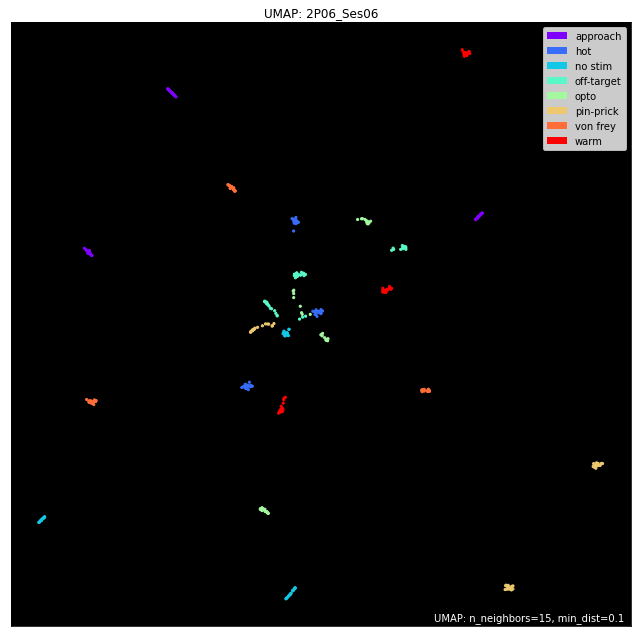

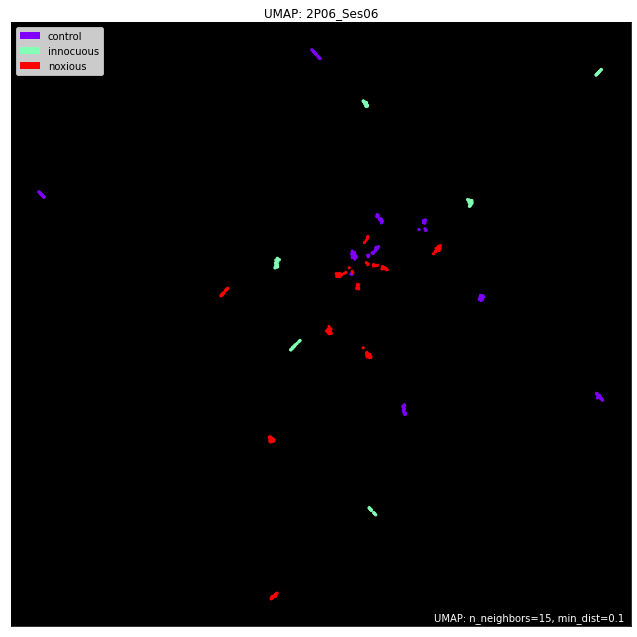

processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07


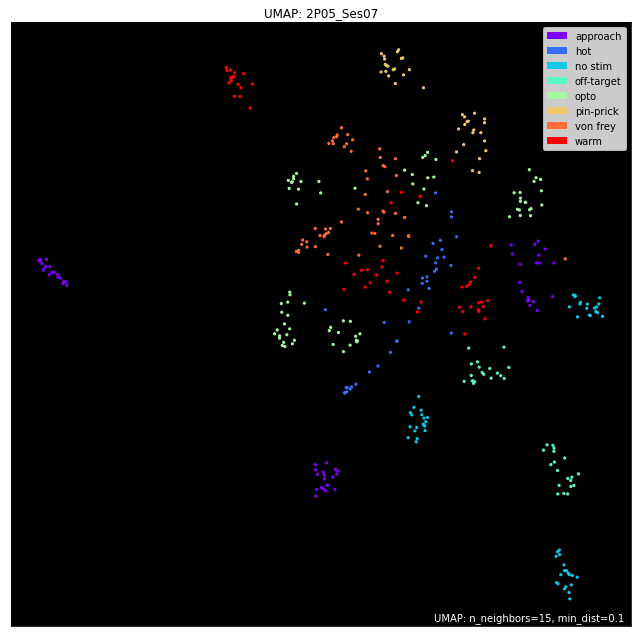

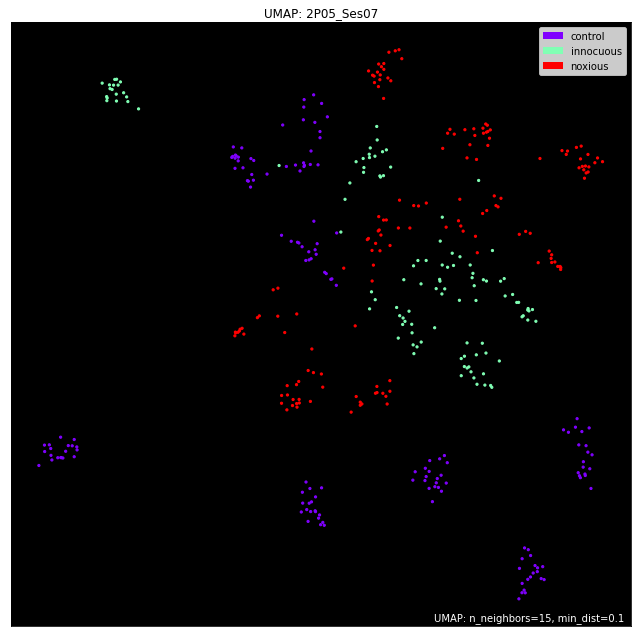

processing:  dF_F0_SHORT_2P06_Ses07.csv
2P06_Ses07


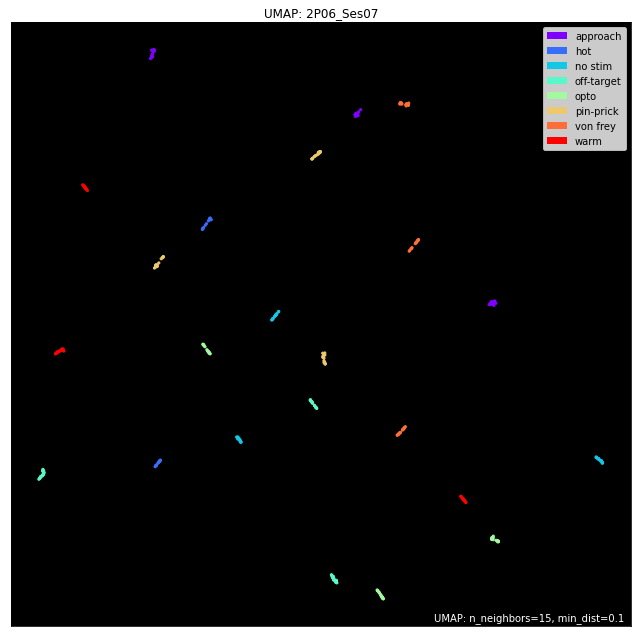

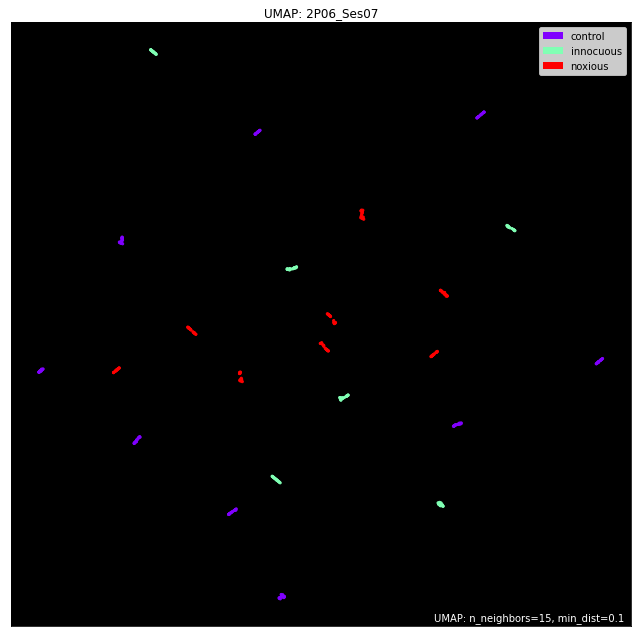

processing:  dF_F0_SHORT_2P07_Ses01.csv
2P07_Ses01


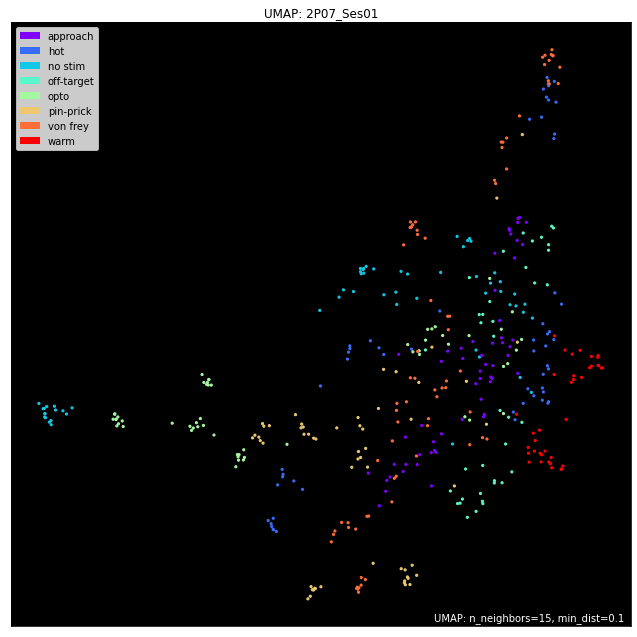

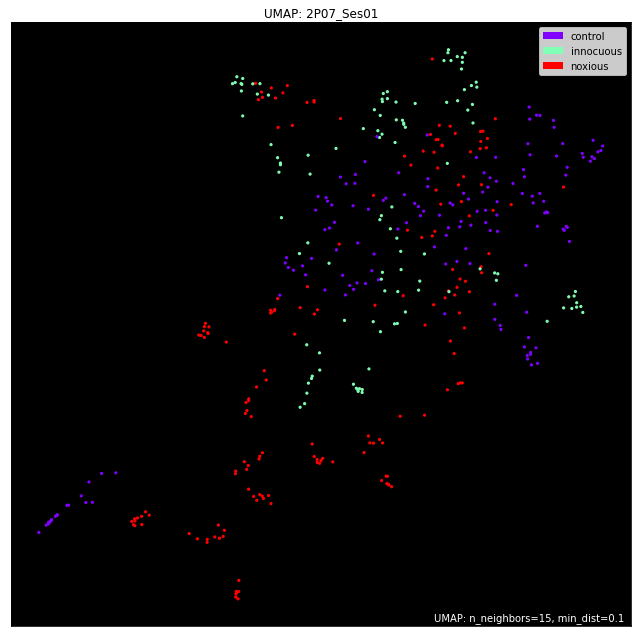

processing:  dF_F0_SHORT_2P08_Ses01.csv
2P08_Ses01


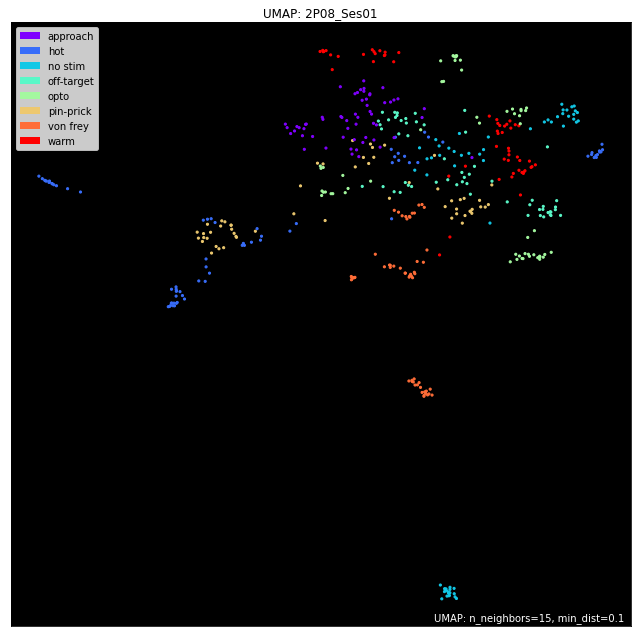

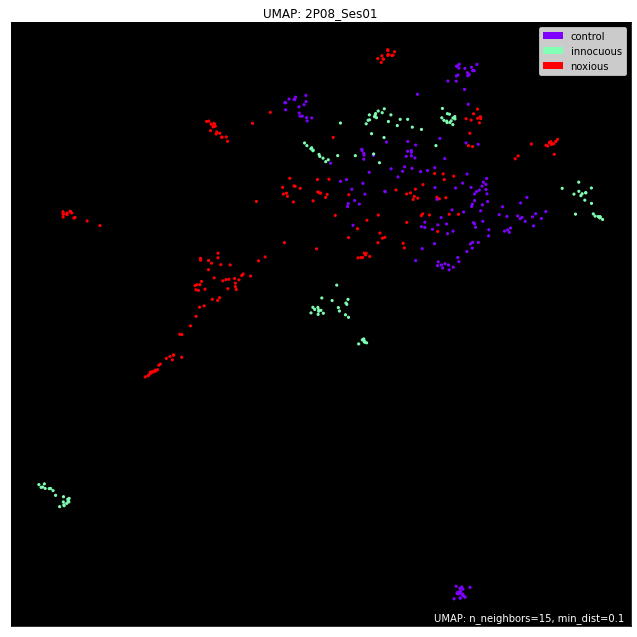

processing:  dF_F0_SHORT_2P07_Ses03.csv
2P07_Ses03


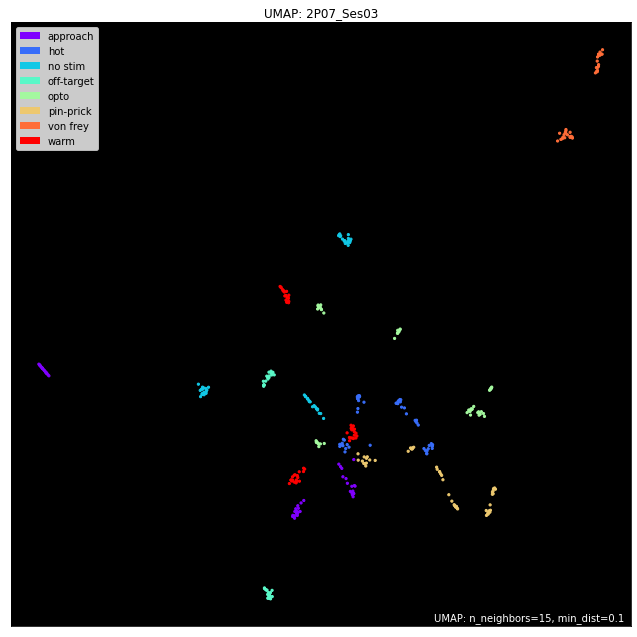

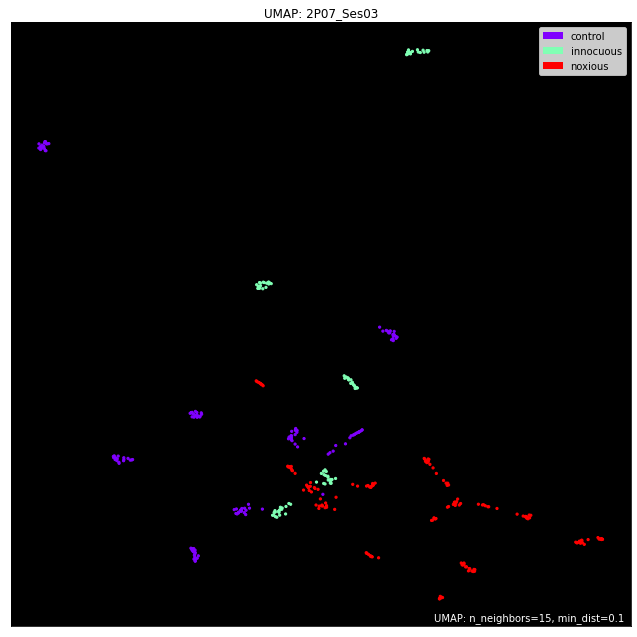

processing:  dF_F0_SHORT_2P08_Ses02.csv
2P08_Ses02


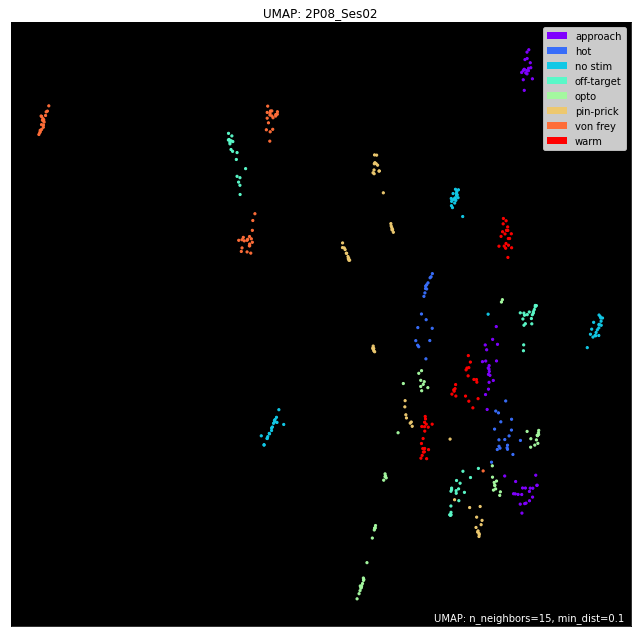

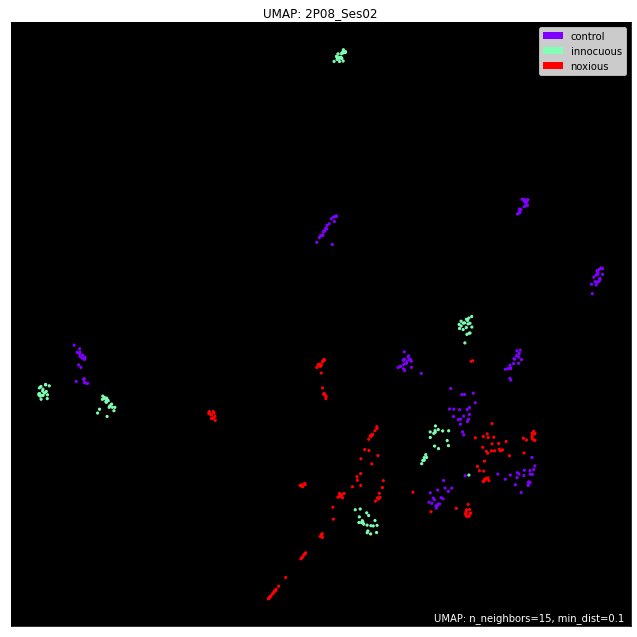

processing:  dF_F0_SHORT_2P07_Ses04.csv
2P07_Ses04


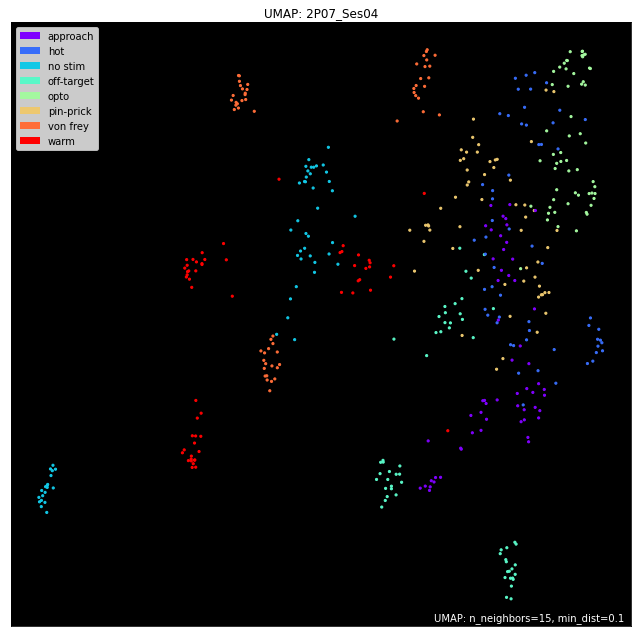

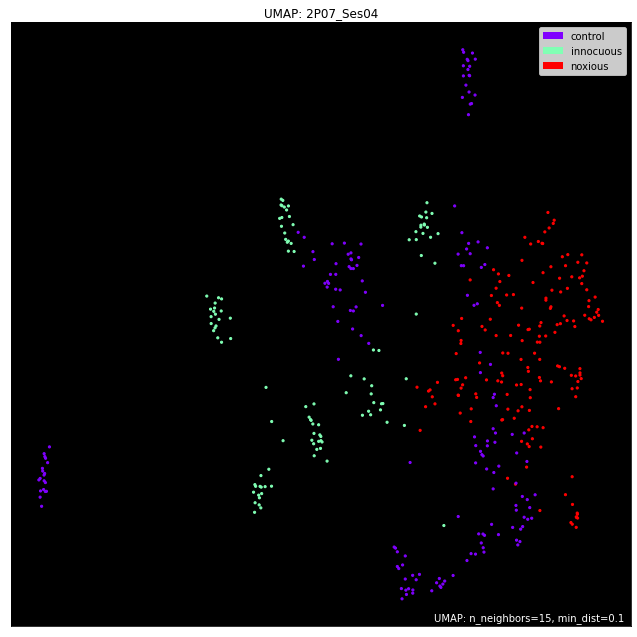

processing:  dF_F0_SHORT_2P07_Ses05.csv
2P07_Ses05


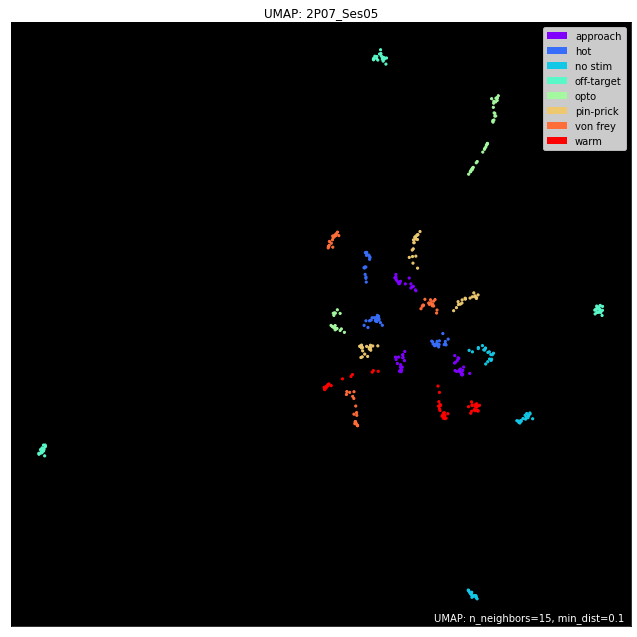

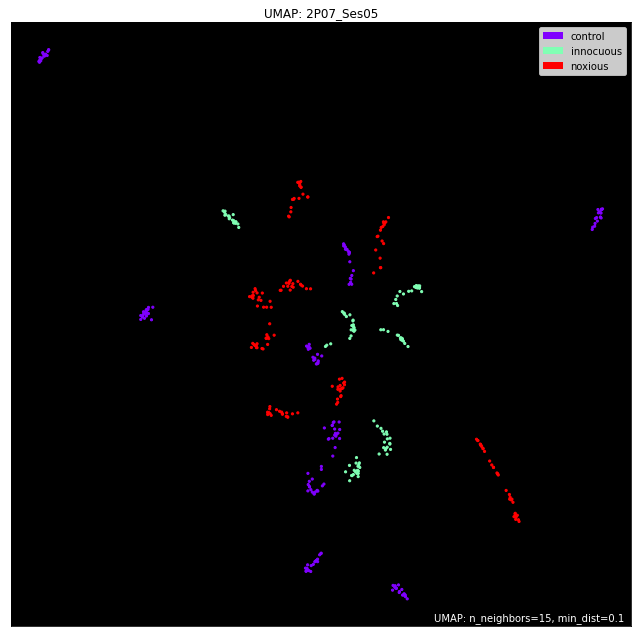

processing:  dF_F0_SHORT_2P08_Ses04.csv
2P08_Ses04


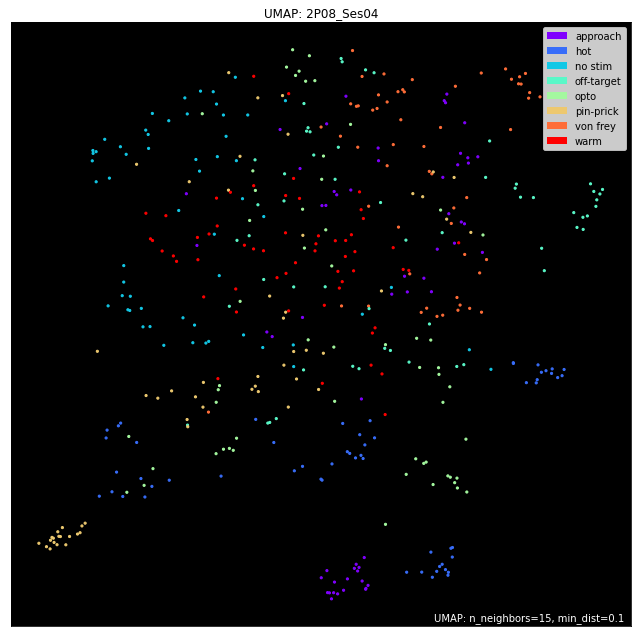

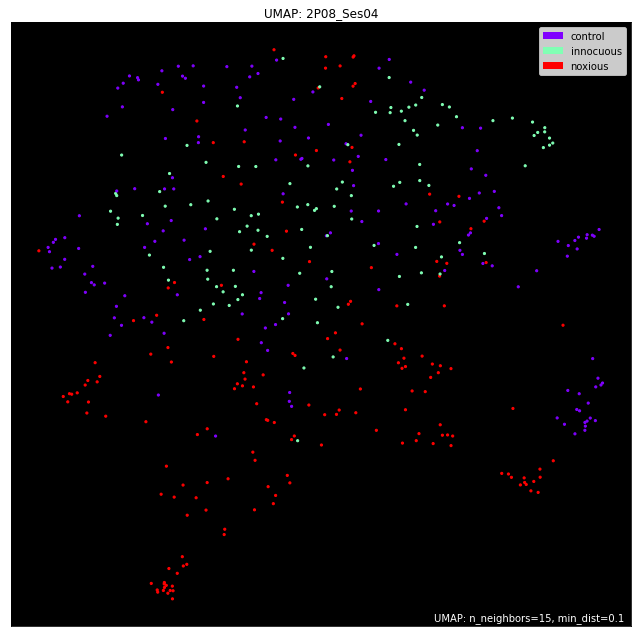

processing:  dF_F0_SHORT_2P07_Ses06.csv
2P07_Ses06


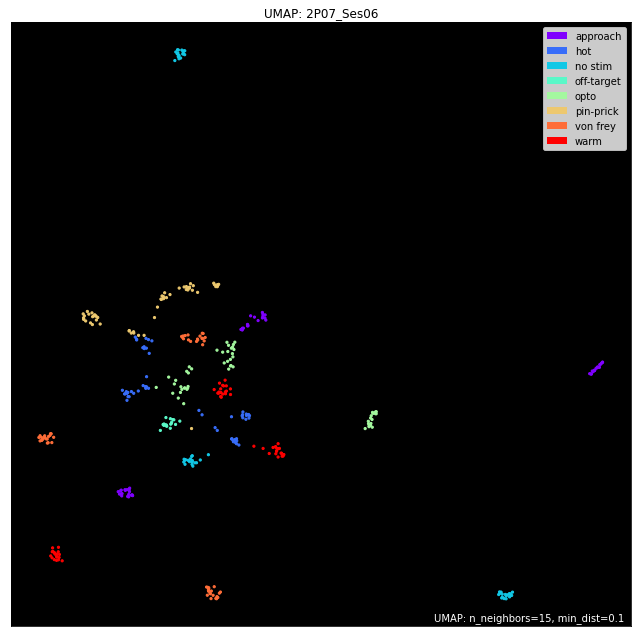

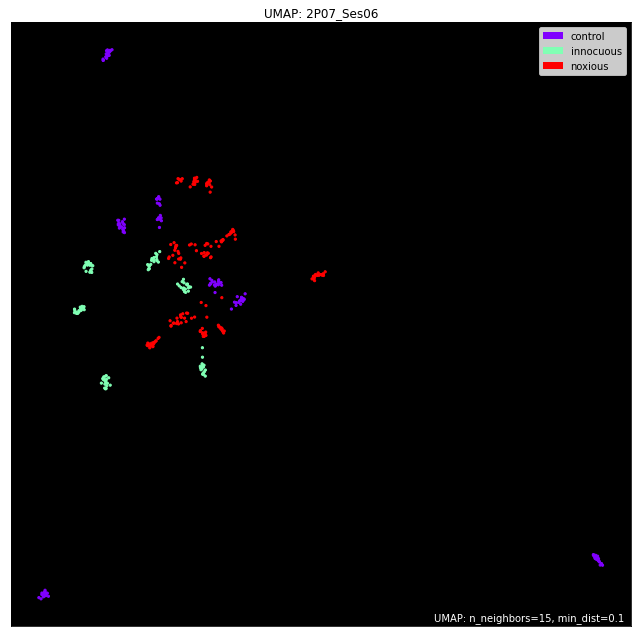

processing:  dF_F0_SHORT_2P08_Ses05.csv
2P08_Ses05


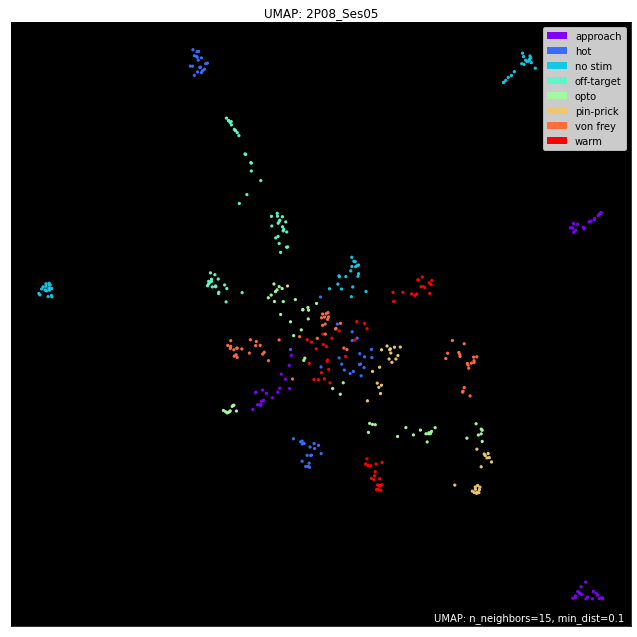

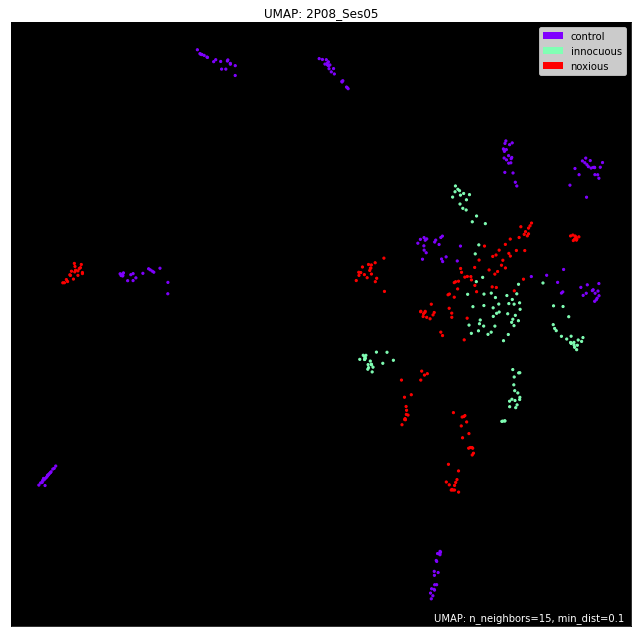

processing:  dF_F0_SHORT_2P07_Ses07.csv
2P07_Ses07


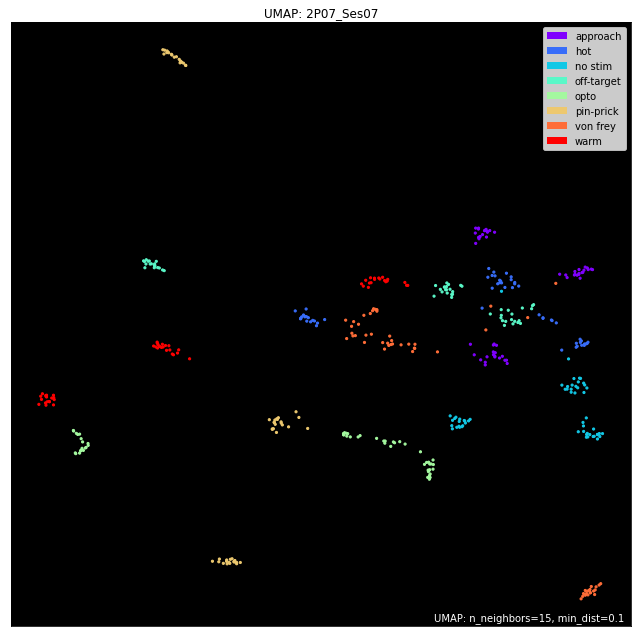

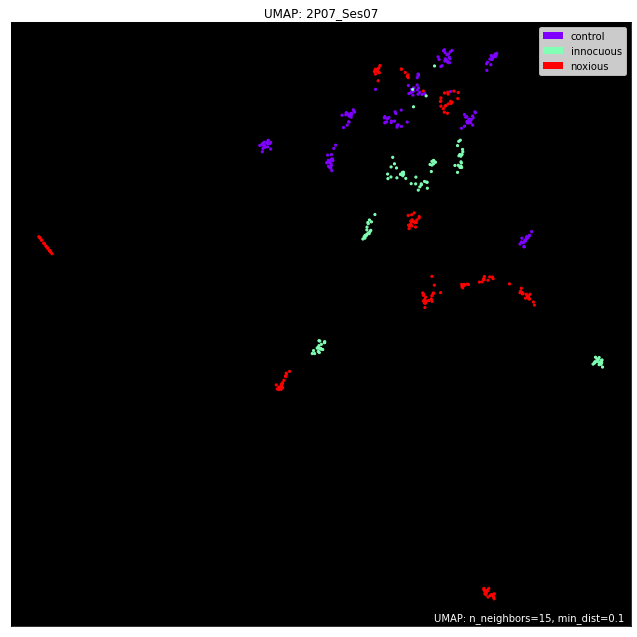

processing:  dF_F0_SHORT_2P08_Ses06.csv
2P08_Ses06


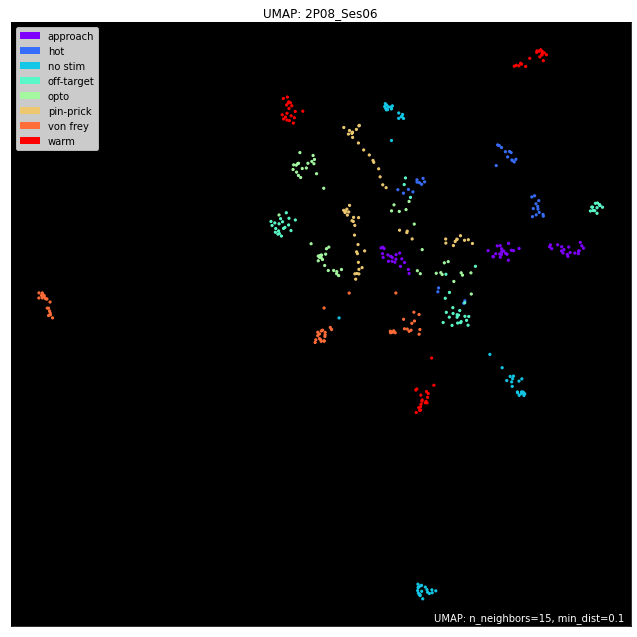

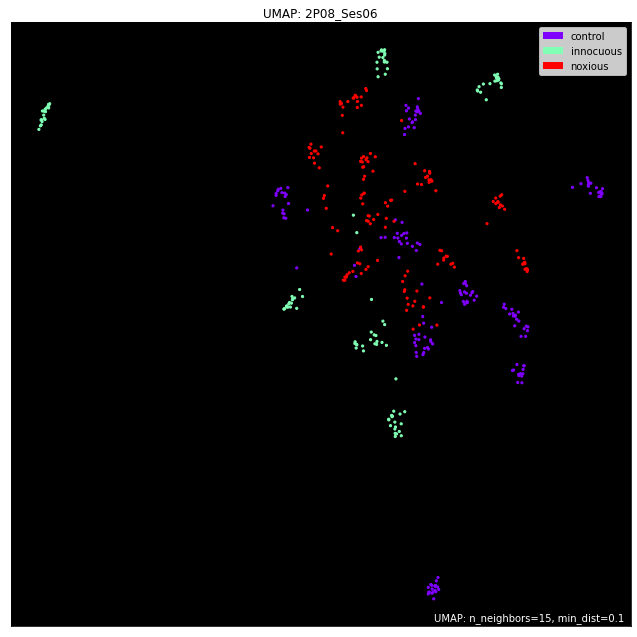

processing:  dF_F0_SHORT_2P07_CFA.csv
2P07_CFA


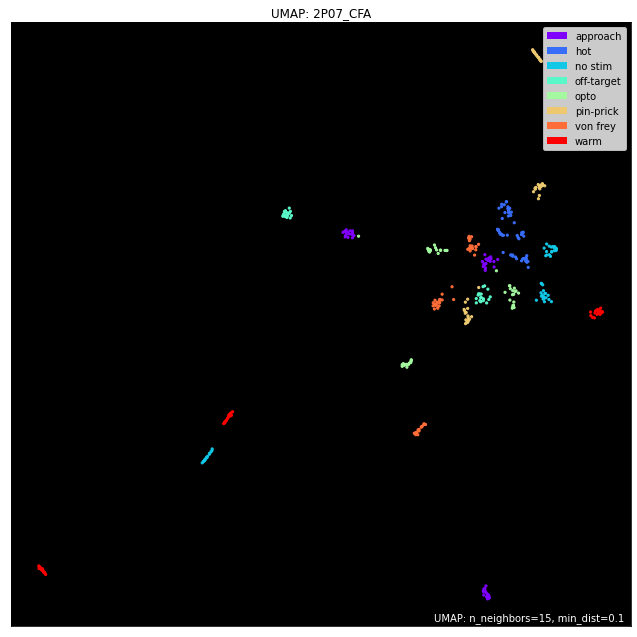

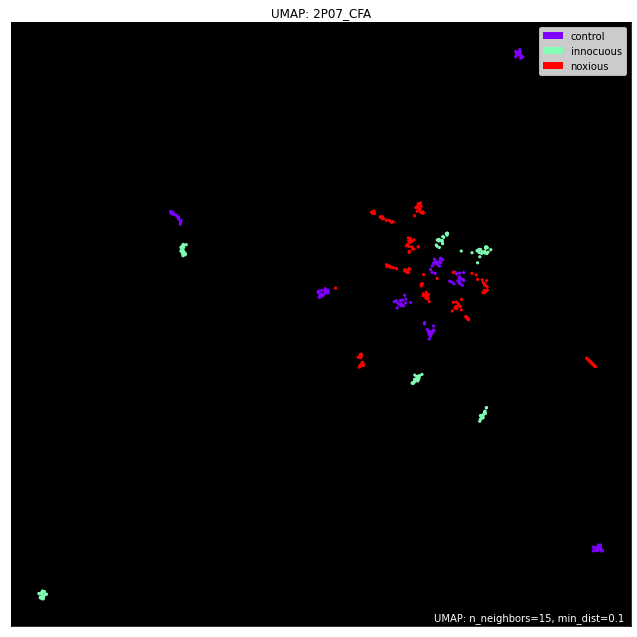

processing:  dF_F0_SHORT_2P09_Ses01.csv
2P09_Ses01


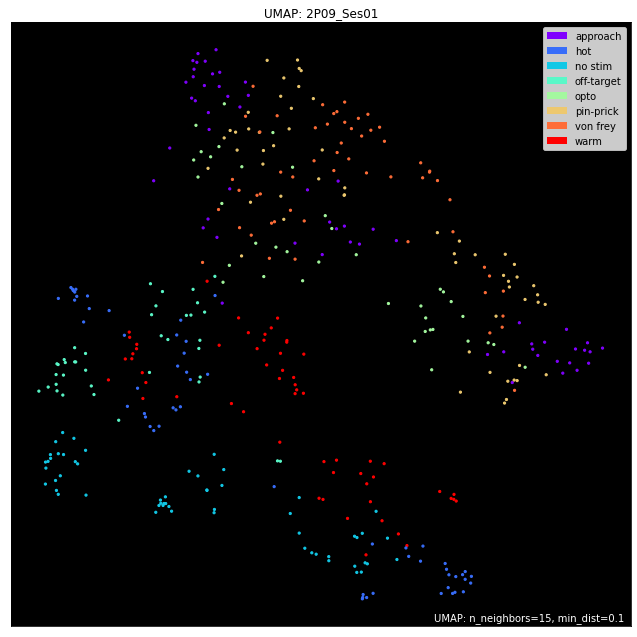

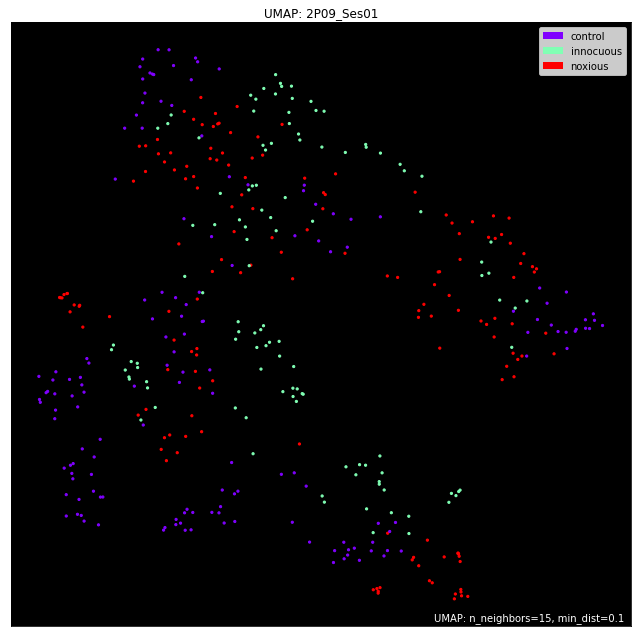

processing:  dF_F0_SHORT_2P08_CFA.csv
2P08_CFA


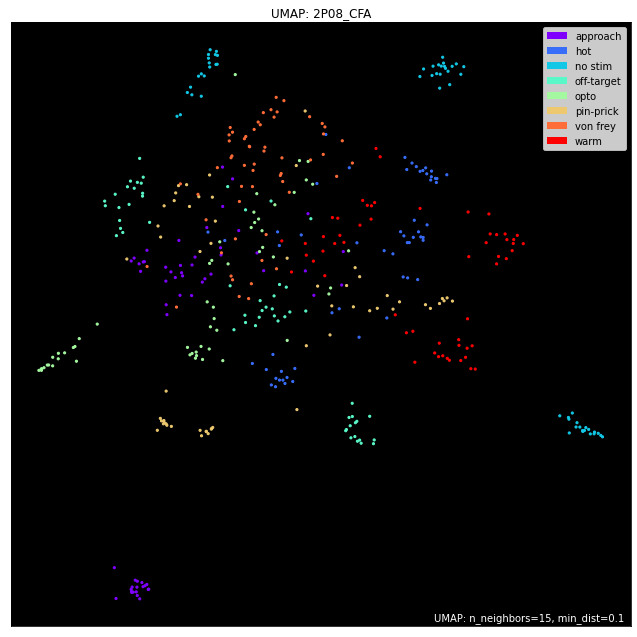

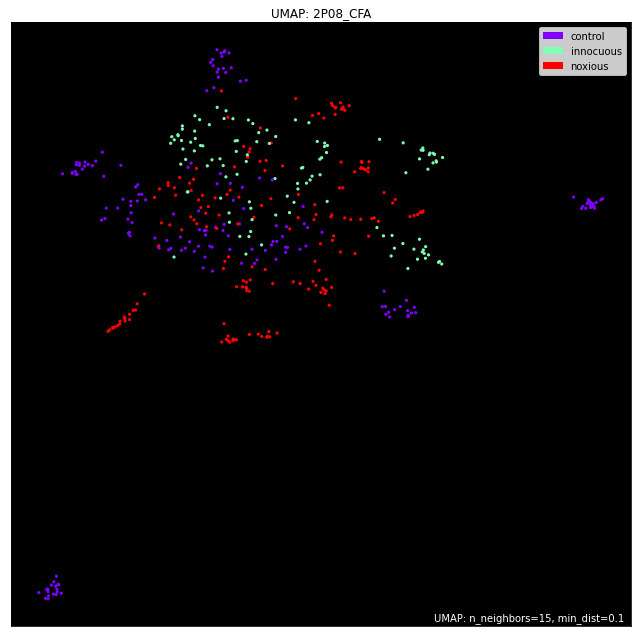

processing:  dF_F0_SHORT_2P11_Ses01.csv
2P11_Ses01


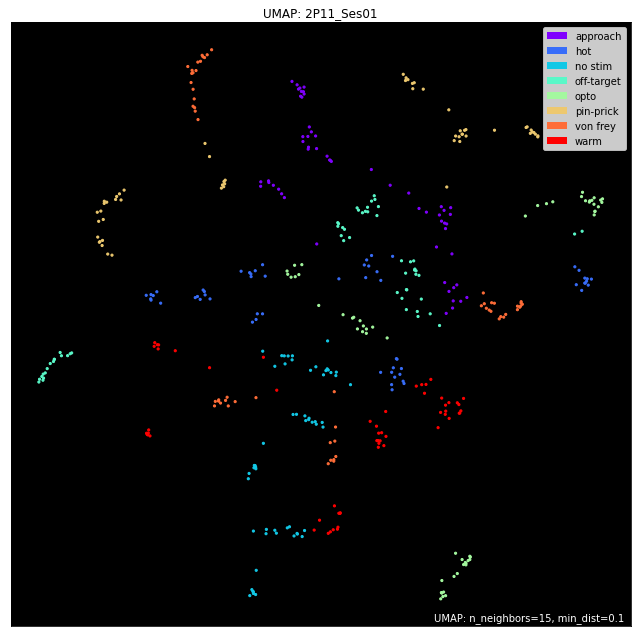

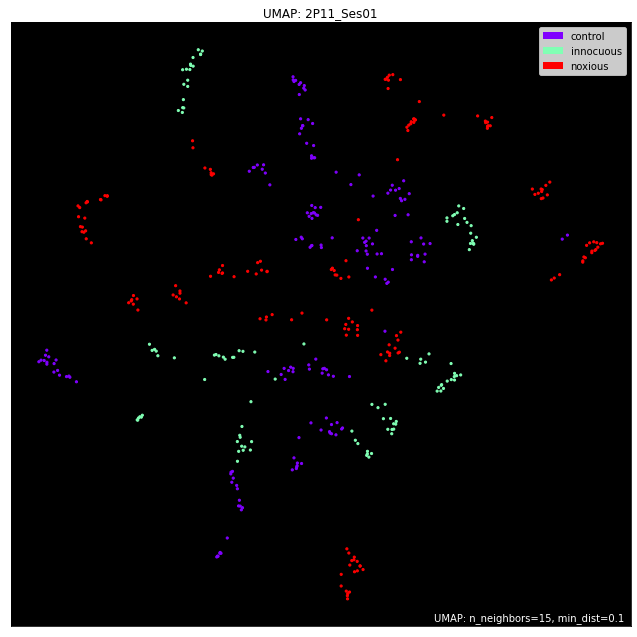

processing:  dF_F0_SHORT_2P10_Ses01.csv
2P10_Ses01


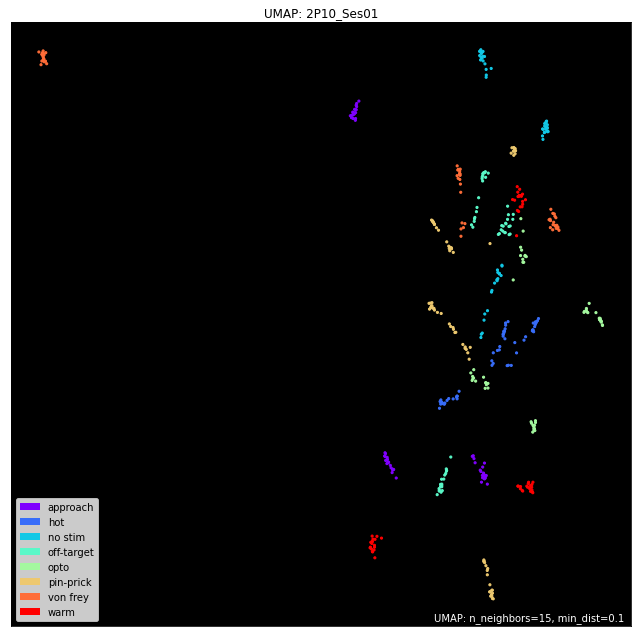

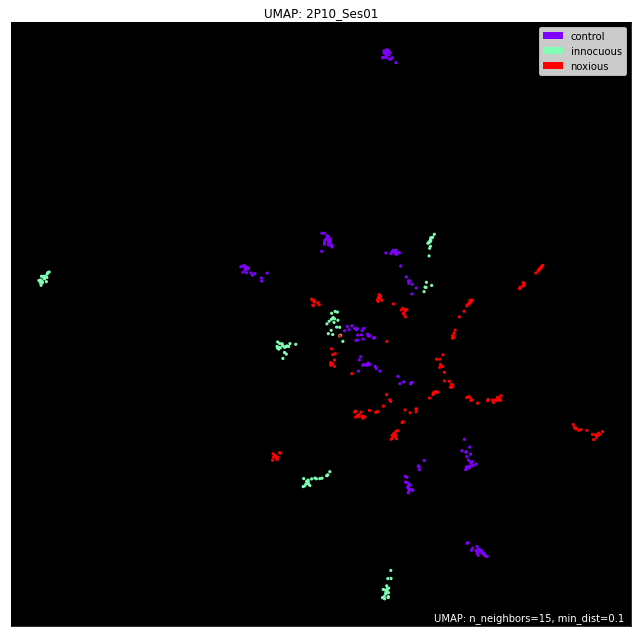

processing:  dF_F0_SHORT_2P09_Ses02.csv
2P09_Ses02


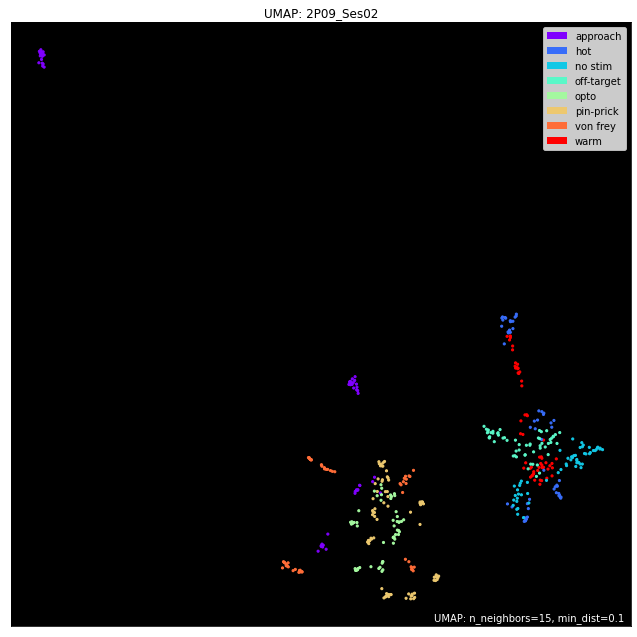

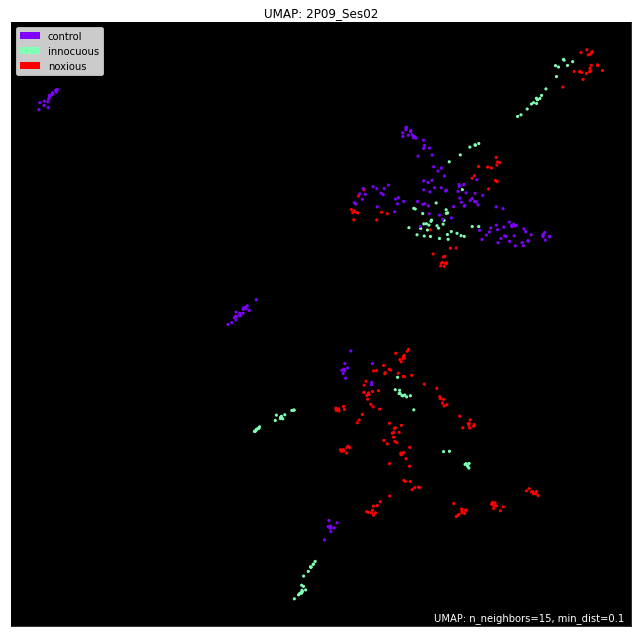

processing:  dF_F0_SHORT_2P10_Ses02.csv
2P10_Ses02


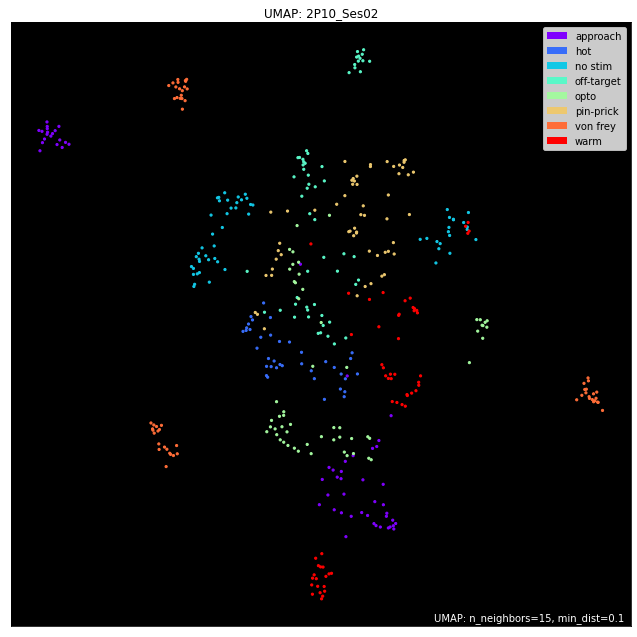

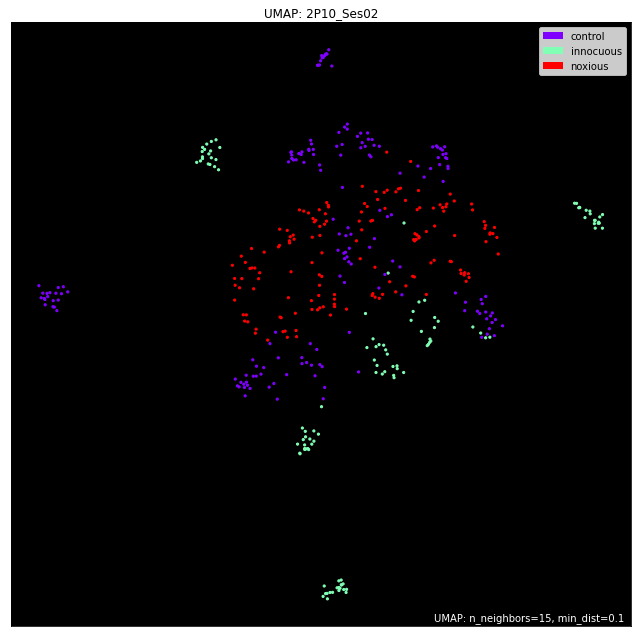

processing:  dF_F0_SHORT_2P09_Ses04.csv
2P09_Ses04


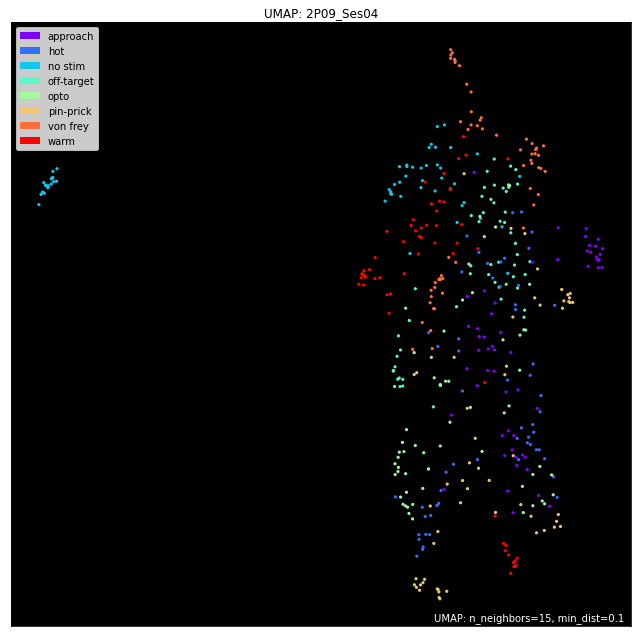

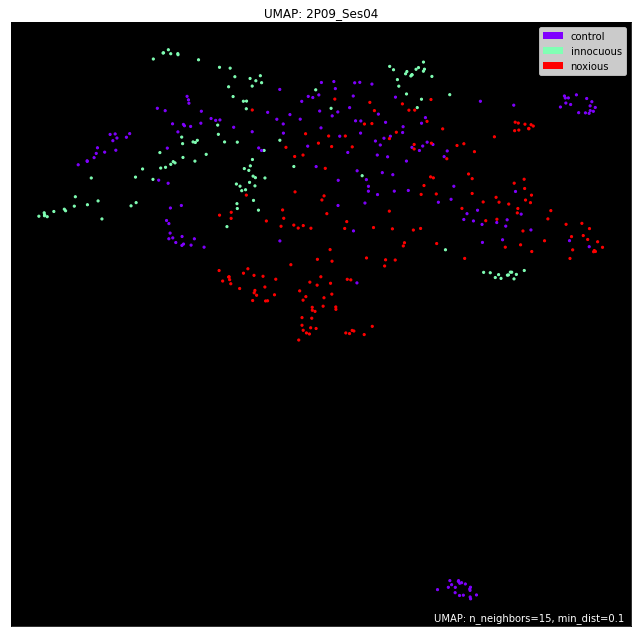

processing:  dF_F0_SHORT_2P11_Ses04.csv
2P11_Ses04


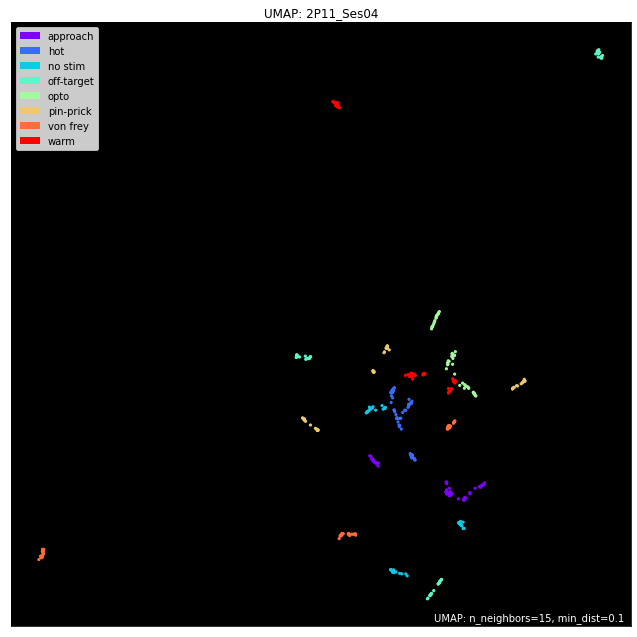

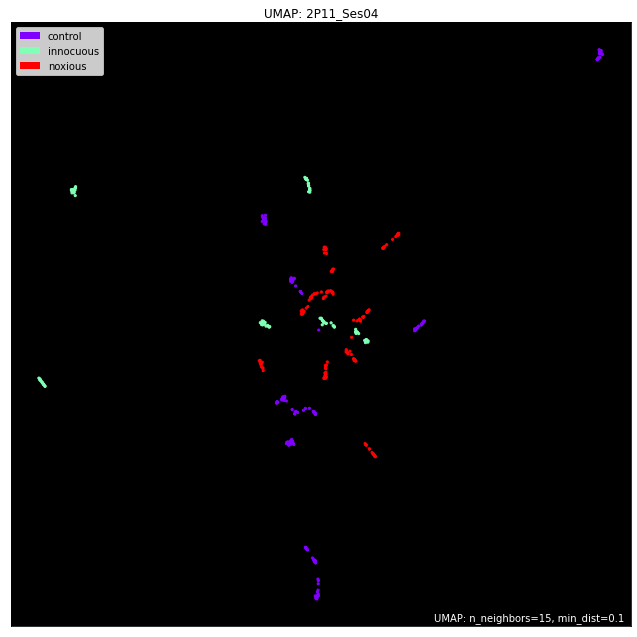

processing:  dF_F0_SHORT_2P11_Ses05.csv
2P11_Ses05


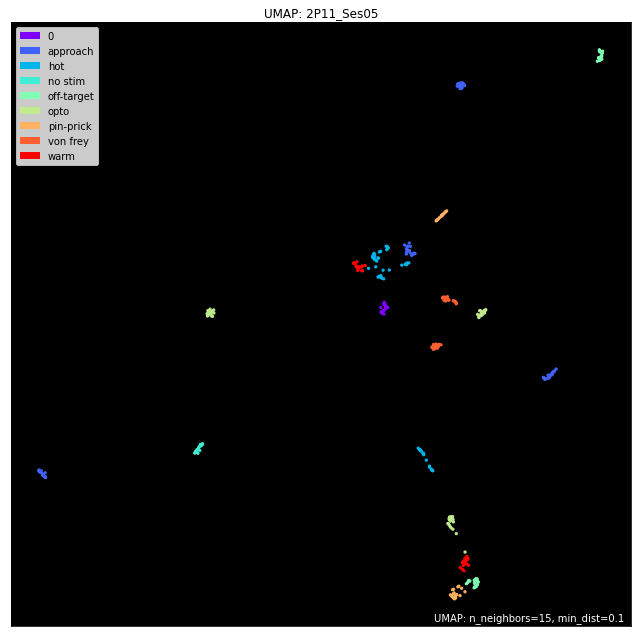

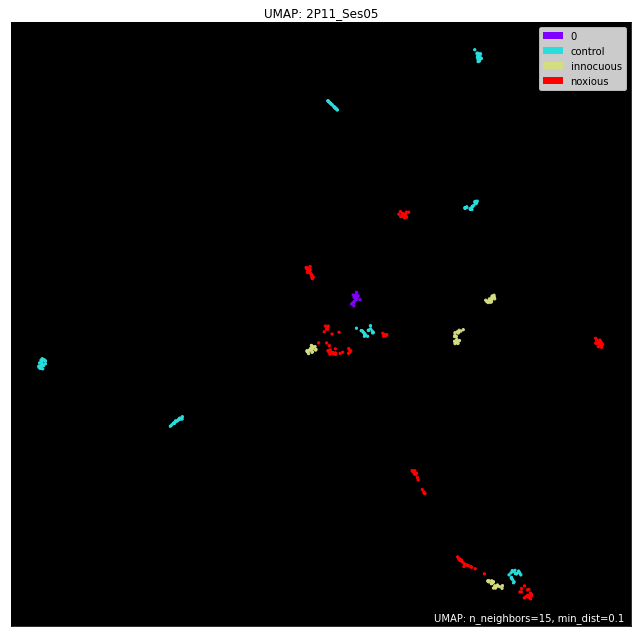

processing:  dF_F0_SHORT_2P10_CFA.csv
2P10_CFA


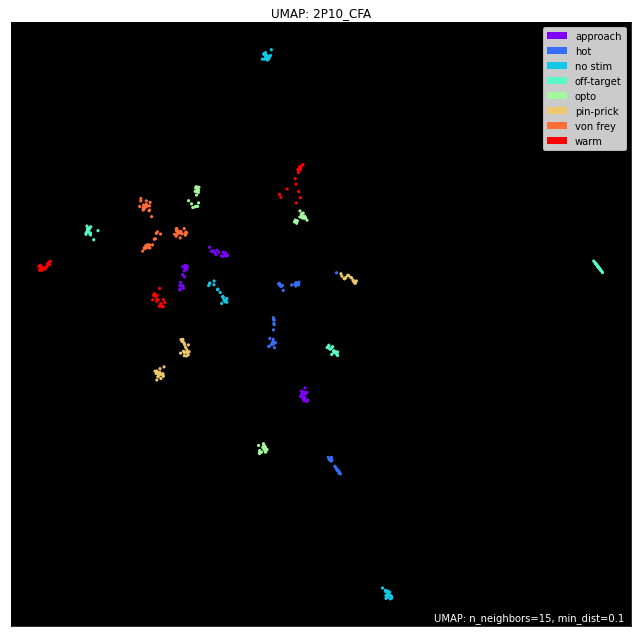

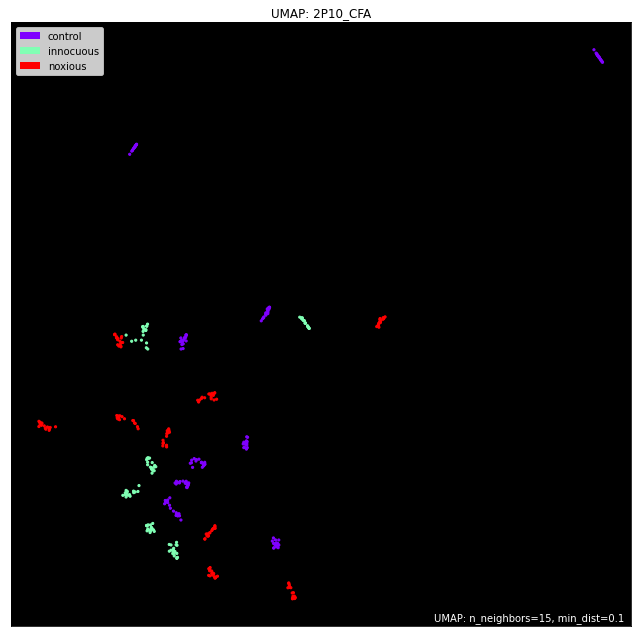

processing:  dF_F0_SHORT_2P09_CFA.csv
2P09_CFA


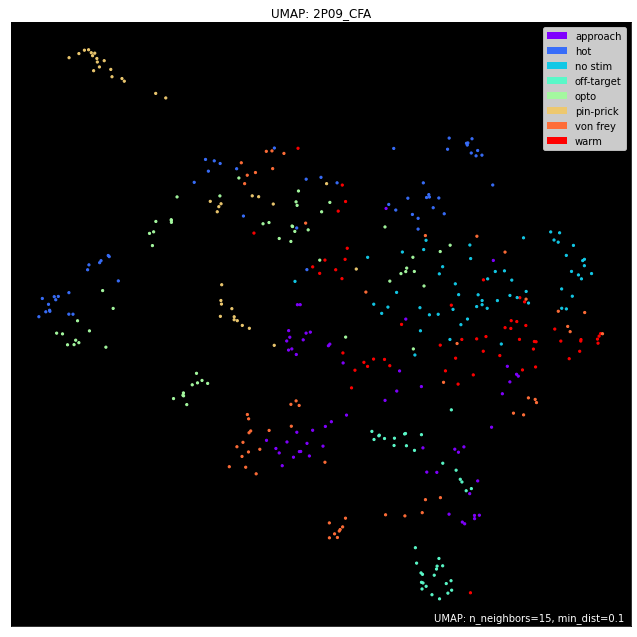

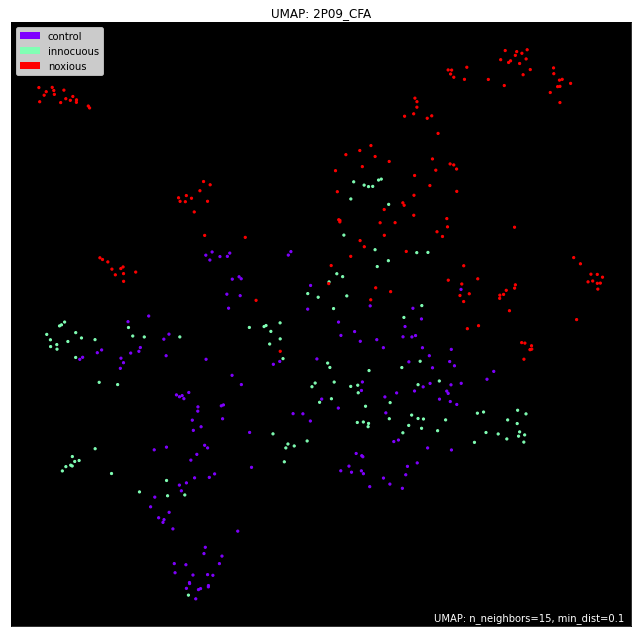

processing:  dF_F0_SHORT_2P11_Ses02.csv
2P11_Ses02


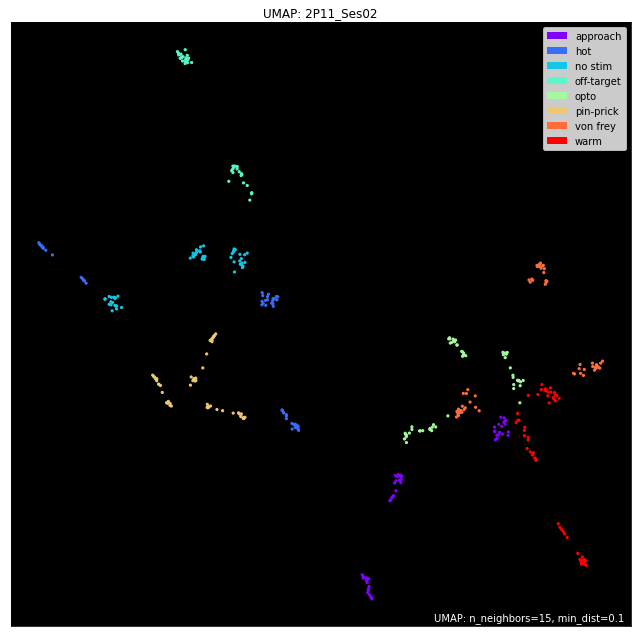

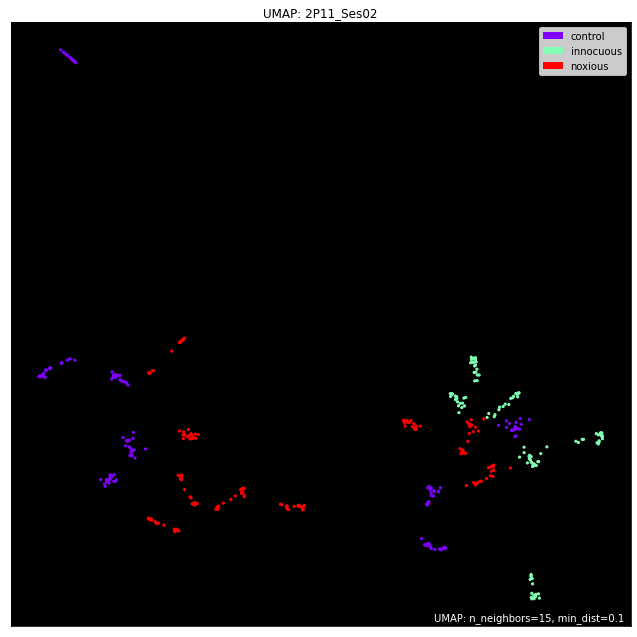

processing:  dF_F0_SHORT_2P09_Ses03.csv
2P09_Ses03


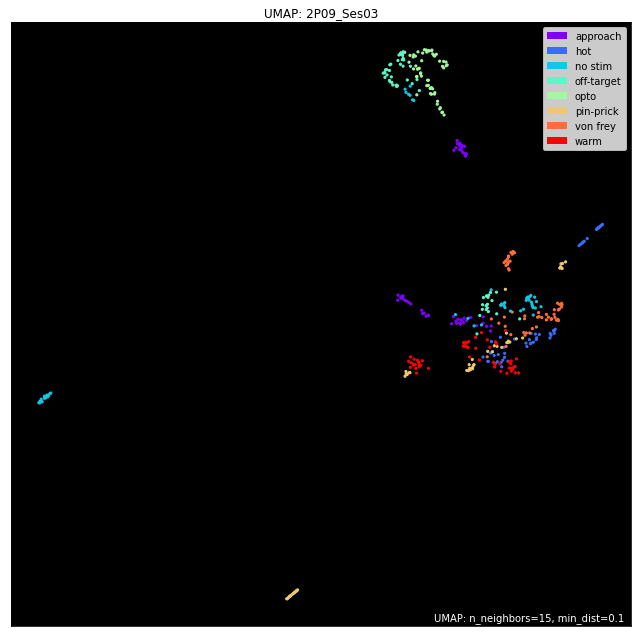

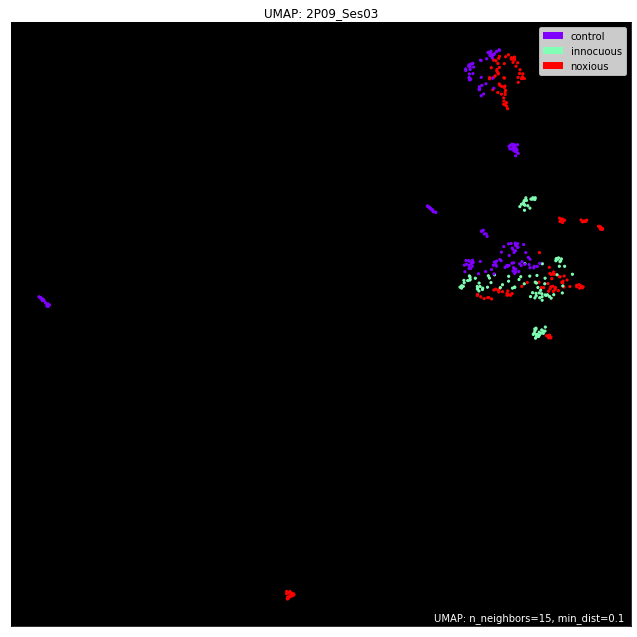

processing:  dF_F0_SHORT_2P10_Ses03.csv
2P10_Ses03


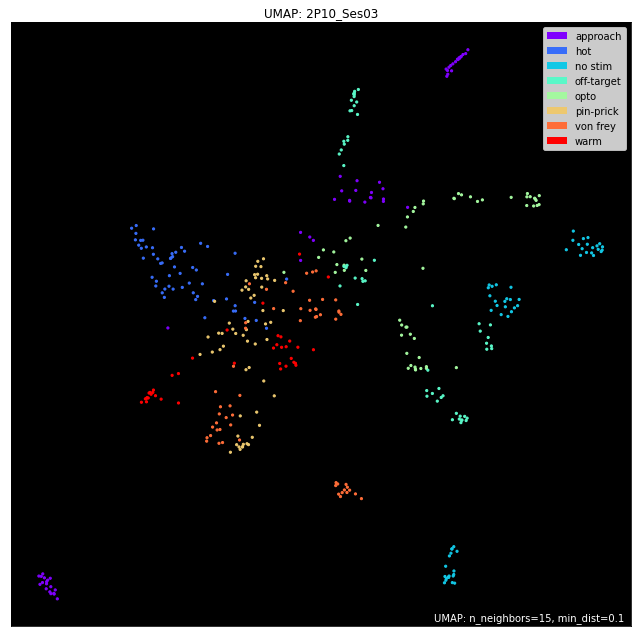

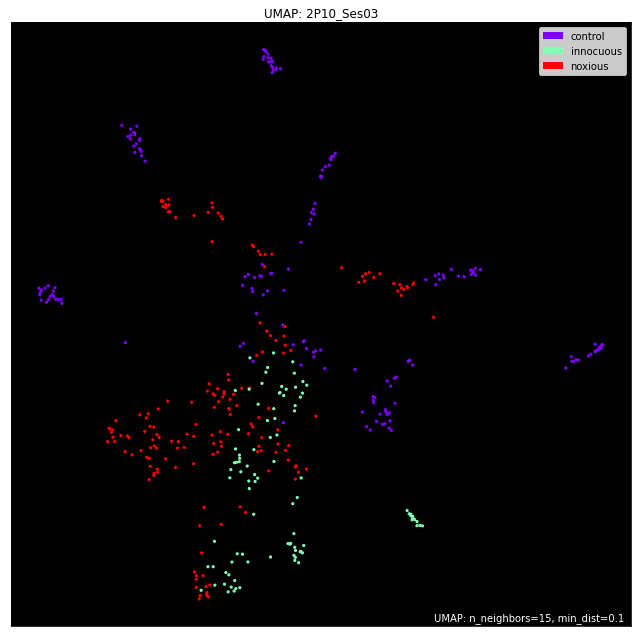

processing:  dF_F0_SHORT_2P10_Ses04.csv
2P10_Ses04


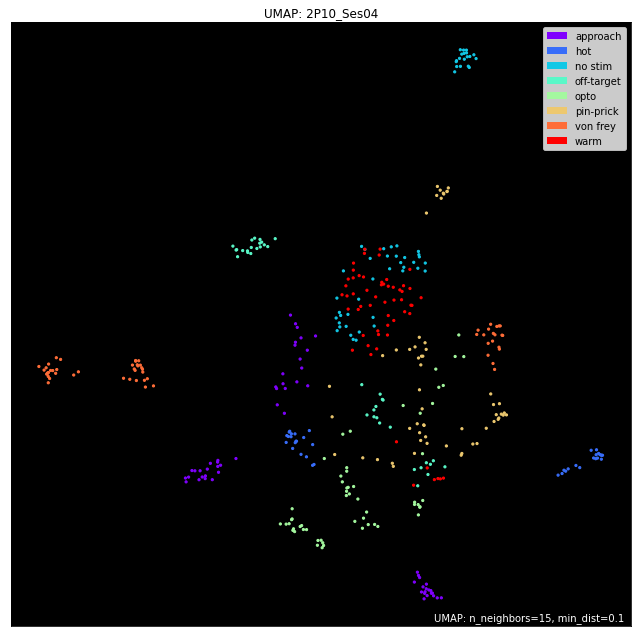

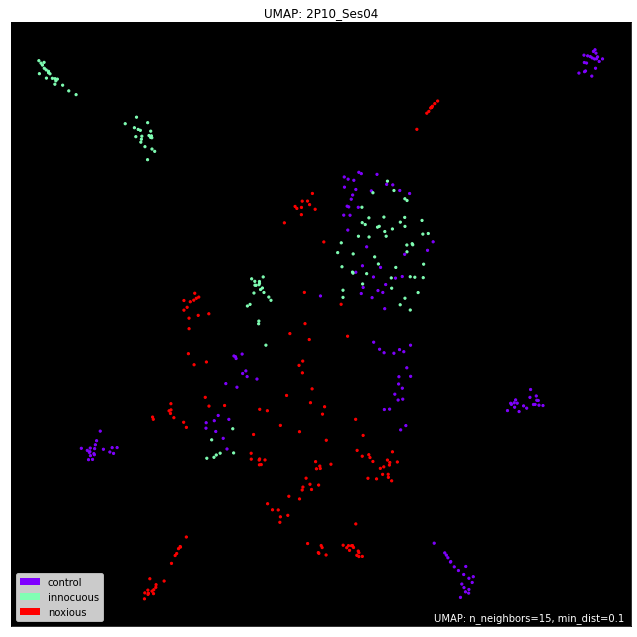

processing:  dF_F0_SHORT_2P09_Ses05.csv
2P09_Ses05


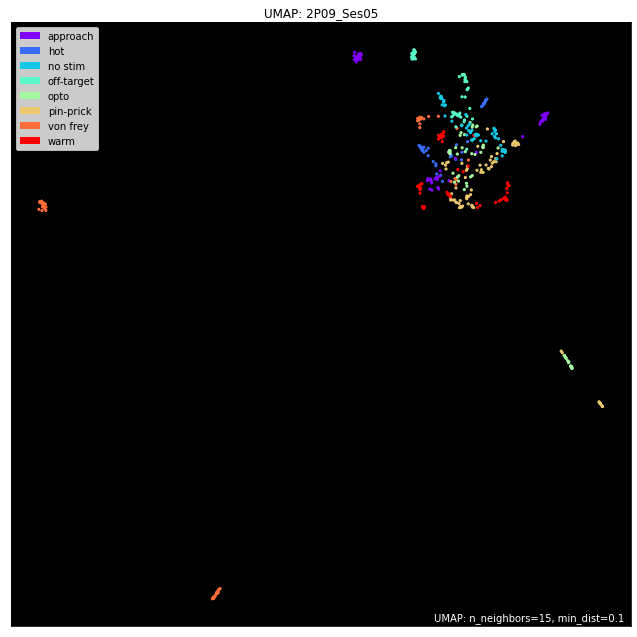

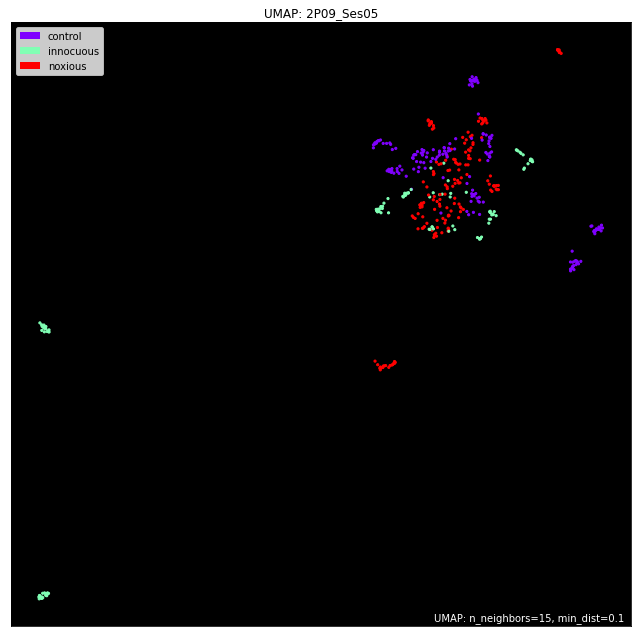

processing:  dF_F0_SHORT_2P10_Ses05.csv
2P10_Ses05


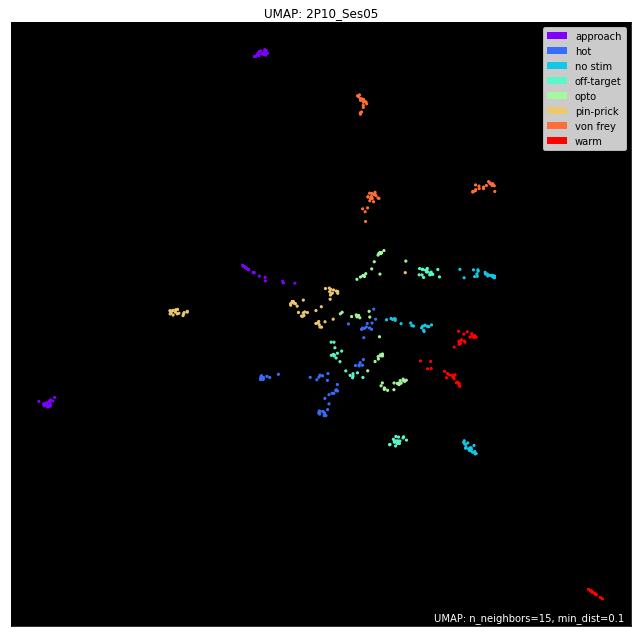

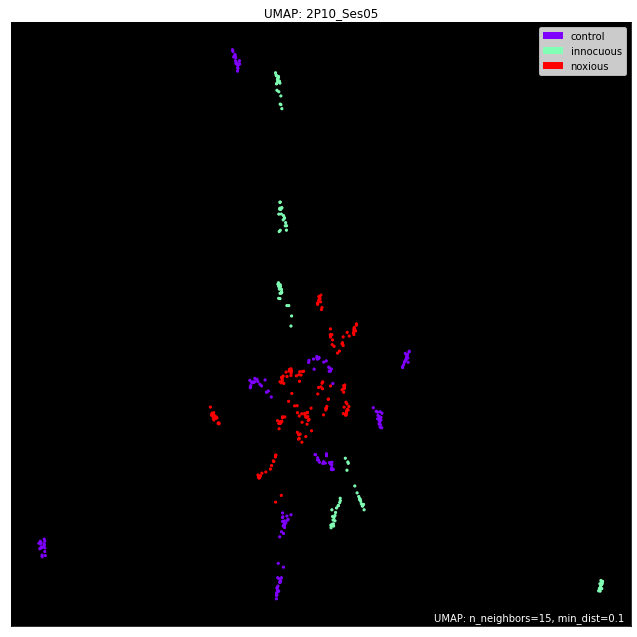

processing:  dF_F0_SHORT_2P11_Ses06.csv
2P11_Ses06


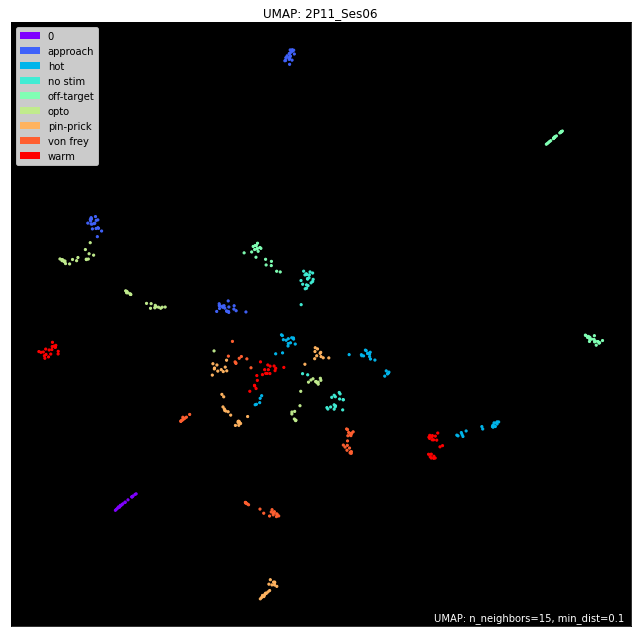

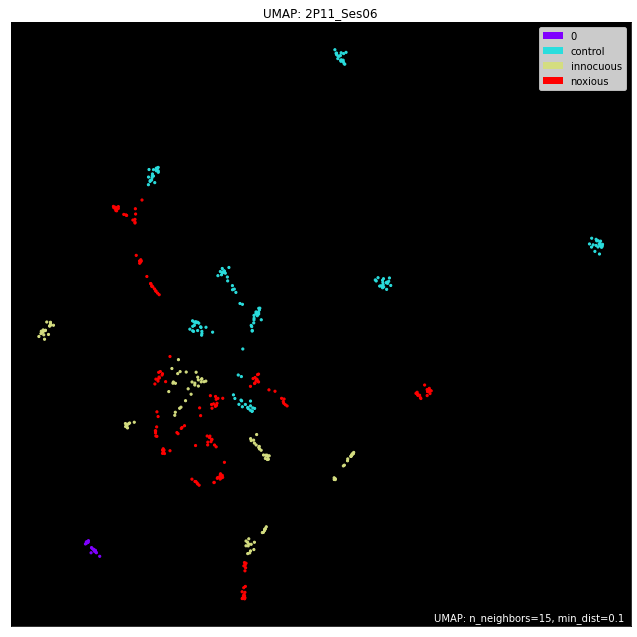

processing:  dF_F0_SHORT_2P11_CFA.csv
2P11_CFA


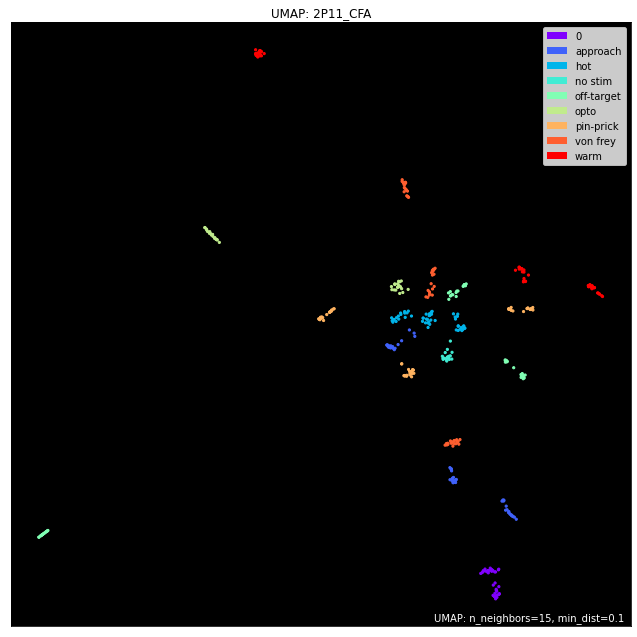

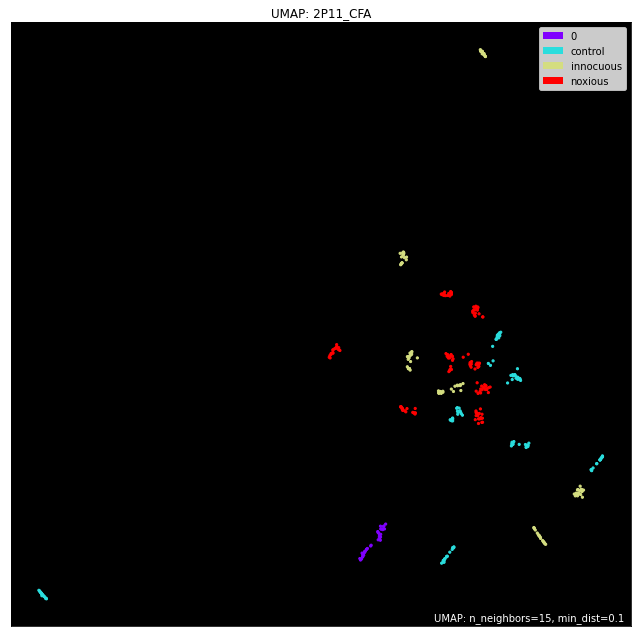

processing:  dF_F0_SHORT_2P05_Ses03.csv
2P05_Ses03


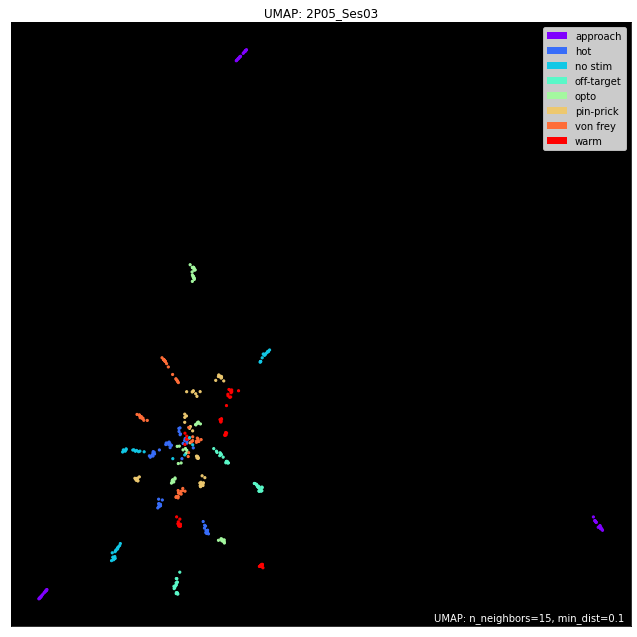

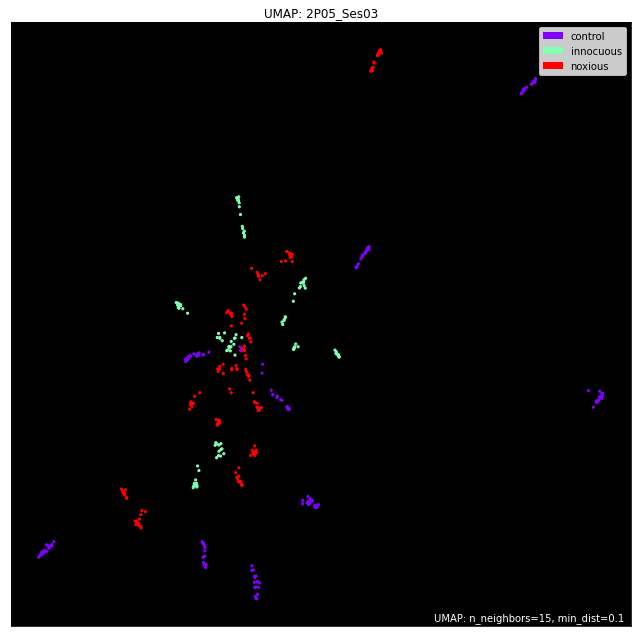

In [3]:
session_names = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    trials = cells['identifier'].unique()
    
    # Add 'modality' column
    conditions = [
    cells['identifier'].str.contains('hot'), cells['identifier'].str.contains('warm'), cells['identifier'].str.contains('opto'),
    cells['identifier'].str.contains('off-target'), cells['identifier'].str.contains('von frey'), cells['identifier'].str.contains('pin-prick'),
    cells['identifier'].str.contains('approach'), cells['identifier'].str.contains('no stim')
    ]

    values = ['hot', 'warm', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

    cells['modality'] = np.select(conditions, values)
    
    # Add 'category' column
    conditions = [
    (cells['modality'] == 'hot')|(cells['modality'] == 'opto')|(cells['modality'] == 'pin-prick'),
    (cells['modality'] == 'warm')|(cells['modality'] == 'von frey'),
    (cells['modality'] == 'off-target')|(cells['modality'] == 'approach')|(cells['modality'] == 'no stim')
    ]

    values = ['noxious', 'innocuous', 'control']

    cells['category'] = np.select(conditions, values)
    
    # Add 'binary' column
    conditions = [
    (cells['modality'] == 'hot')|(cells['modality'] == 'opto')|(cells['modality'] == 'pin-prick')|(cells['modality'] == 'warm')|(cells['modality'] == 'von frey'),
    (cells['modality'] == 'off-target')|(cells['modality'] == 'approach')|(cells['modality'] == 'no stim')
    ]

    values = ['stimulation', 'control']

    cells['binary'] = np.select(conditions, values)
    
    modalities = np.array(cells['modality'])
    categories = np.array(cells['category'])
    binaries = np.array(cells['binary'])
    traces = cells.drop(['identifier','modality', 'category', 'binary'], axis=1)
    traces = np.array(traces)
    
    mapper = umap.UMAP().fit(traces)
    umap.plot.points(mapper, labels=modalities, theme='fire')
    plt.title('UMAP: '+ ses_name)
    plt.savefig(os.path.join(output_path, ses_name+'_umap_modalities.png'))
    plt.show()
    
    mapper = umap.UMAP().fit(traces)
    umap.plot.points(mapper, labels=categories, theme='fire')
    plt.title('UMAP: '+ ses_name)
    plt.savefig(os.path.join(output_path, ses_name+'_umap_categories.png'))
    plt.show()

In [5]:
embedding = umap.UMAP(n_neighbors=8,
                      min_dist=0.3,
                      metric='correlation').fit_transform(traces)

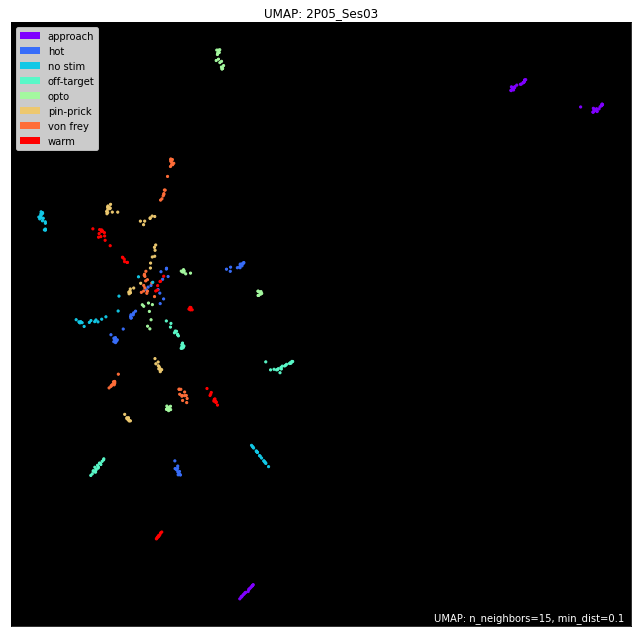

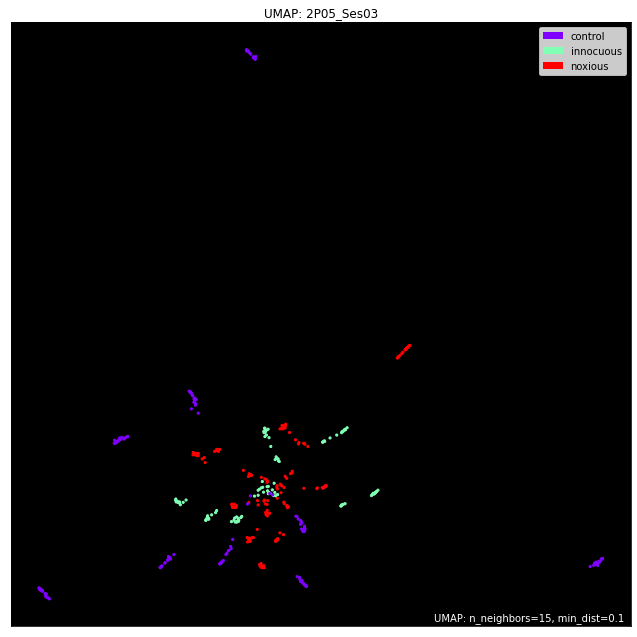

In [23]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(traces)

mapper = umap.UMAP().fit(traces)
umap.plot.points(mapper, labels=modalities, theme='fire')
plt.title('UMAP: '+ ses_name)
plt.show()
    
mapper = umap.UMAP().fit(traces)
umap.plot.points(mapper, labels=categories, theme='fire')
plt.title('UMAP: '+ ses_name)
plt.show()